In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv('C:\\Users\\USER\\Desktop\\FCUP - Doutoramento\\PHD_Thesis_Git_Code\\WTCCC\\table_study_cases_control_with_scores_and_new_controls.csv')

In [3]:
copy = dataset
copy['cohort'] = copy['cohort'].map({'case': 1 ,'control': 0})
dummy_dataset = copy.drop(columns=['patient', 'Age', 'Region', 'Gender'])
dummy_dataset = pd.get_dummies(dummy_dataset)



In [4]:
dummy_dataset_case = dummy_dataset[(dummy_dataset['cohort'] == 0)]
dummy_dataset_control = dummy_dataset[dummy_dataset['cohort'] == 1]

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,score1_<= 0.2-1,score1_[0.2-0.4]-1,score1_[0.4-0.6]-1,score1_[0.6-0.8]-1,score1_[0.8-0.9]-1,score1_[0.9-1.0]-1,...,score6_[0.8-0.9]-6,score6_[0.9-1.0]-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7,score7_<= 0.2-7,score7_[0.4-0.6]-7,score7_[0.6-0.8]-7,score7_[0.8-0.9]-7,score7_[0.9-1.0]-7
cohort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs1523041_CC-1,NaN,1.000000,-0.759582,-0.311191,-0.020318,-0.014364,-0.003194,-0.014364,-0.020318,0.030613,...,-0.014364,0.014084,0.028273,-0.024522,-0.023831,-0.019867,NaN,NaN,-0.020318,0.027380
rs1523041_CG-1,NaN,-0.759582,1.000000,-0.381742,0.000912,0.018911,-0.030530,-0.017621,0.000912,0.016353,...,0.018911,-0.001826,-0.013362,0.007295,0.036262,0.031434,NaN,NaN,0.026748,-0.040619
rs1523041_GG-1,NaN,-0.311191,-0.381742,1.000000,0.027539,-0.007219,0.049148,0.046159,0.027539,-0.067396,...,-0.007219,-0.017346,-0.020653,0.024188,-0.019119,-0.017698,NaN,NaN,-0.010211,0.020442
score1_<= 0.2-1,NaN,-0.020318,0.000912,0.027539,1.000000,-0.000471,-0.000817,-0.000471,-0.000667,-0.470854,...,-0.000471,-0.249083,0.008051,-0.007934,-0.001248,-0.001155,NaN,NaN,-0.000667,0.001335
score1_[0.2-0.4]-1,NaN,-0.014364,0.018911,-0.007219,-0.000471,1.000000,-0.000577,-0.000333,-0.000471,-0.332889,...,-0.000333,0.000944,0.005692,-0.005609,-0.000883,-0.000817,NaN,NaN,-0.000471,0.000944
score1_[0.4-0.6]-1,NaN,-0.003194,-0.030530,0.049148,-0.000817,-0.000577,1.000000,-0.000577,-0.000817,-0.576772,...,-0.000577,0.001635,0.009862,-0.009719,-0.001529,-0.001415,NaN,NaN,-0.000817,0.001635
score1_[0.6-0.8]-1,NaN,-0.014364,-0.017621,0.046159,-0.000471,-0.000333,-0.000577,1.000000,-0.000471,-0.332889,...,-0.000333,0.000944,0.005692,-0.005609,-0.000883,-0.000817,NaN,NaN,-0.000471,0.000944
score1_[0.8-0.9]-1,NaN,-0.020318,0.000912,0.027539,-0.000667,-0.000471,-0.000817,-0.000471,1.000000,-0.470854,...,-0.000471,0.001335,-0.037379,0.038046,-0.001248,-0.001155,NaN,NaN,-0.000667,0.001335
score1_[0.9-1.0]-1,NaN,0.030613,0.016353,-0.067396,-0.470854,-0.332889,-0.576772,-0.332889,-0.470854,1.000000,...,0.001001,0.115351,0.004342,-0.004850,0.002651,0.002454,NaN,NaN,0.001416,-0.002835


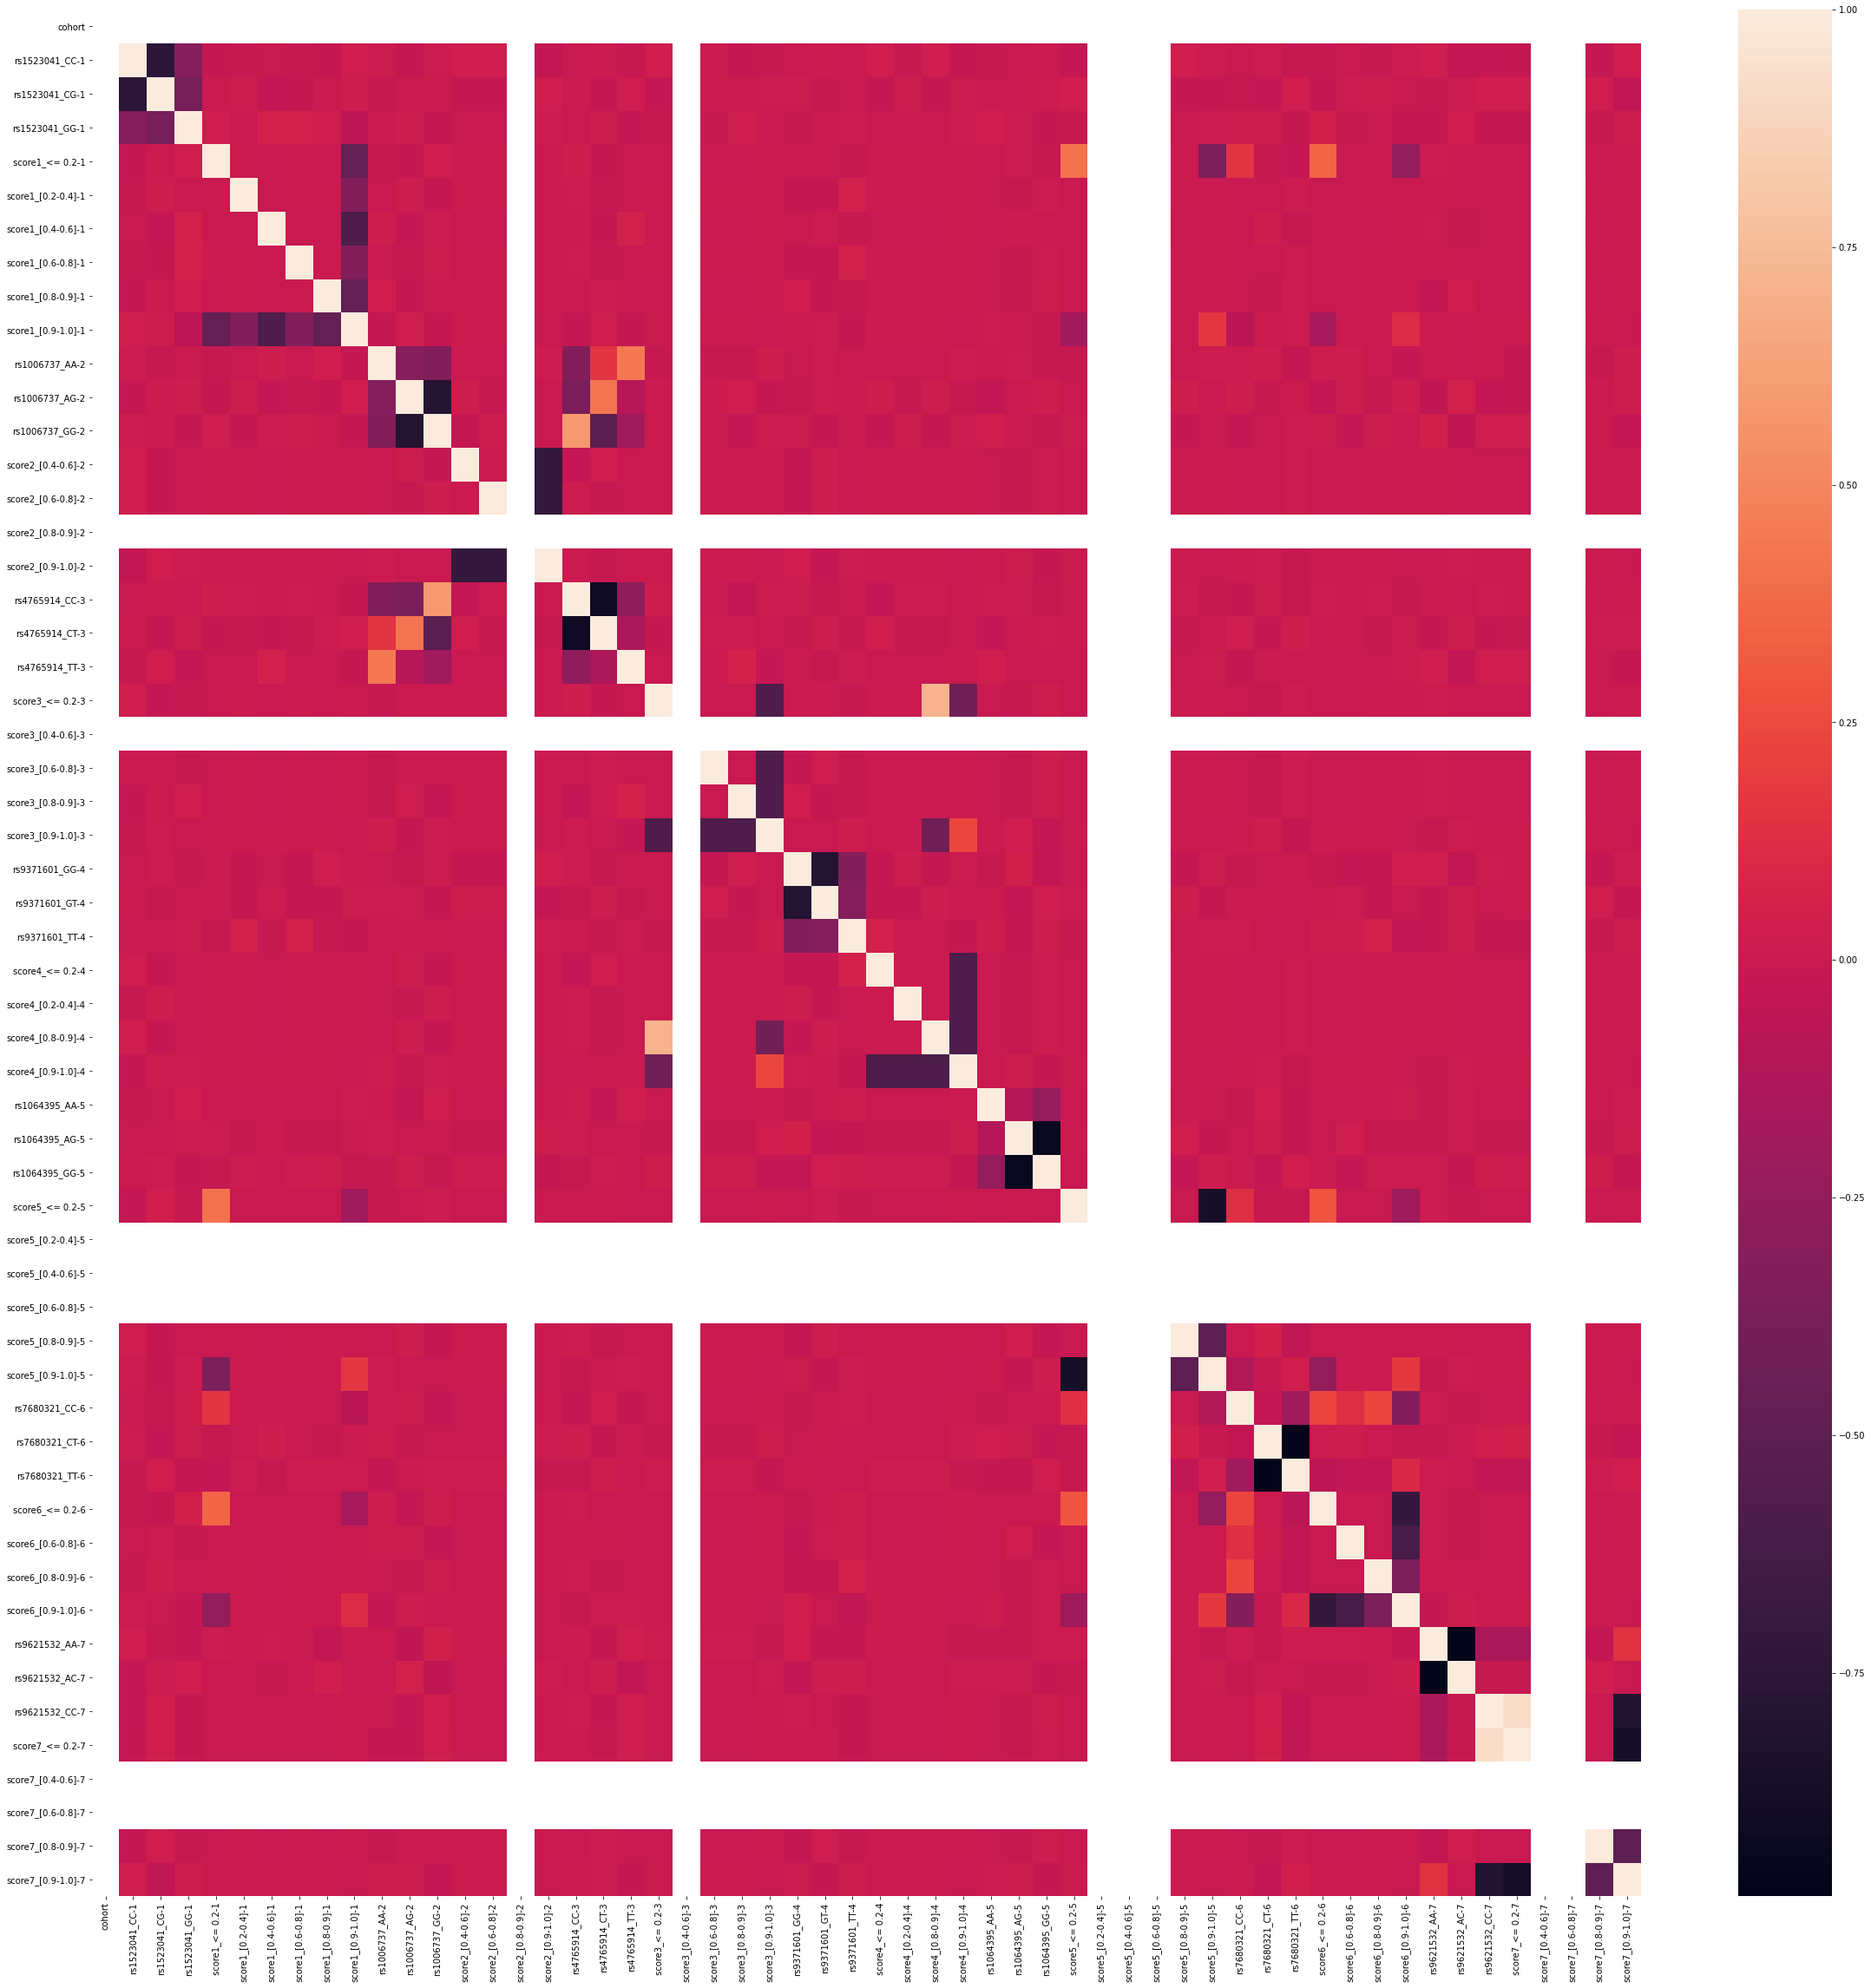

In [15]:
from matplotlib.colors import ListedColormap

corrMatrix_case_spearman = dummy_dataset_case.corr(method="spearman")
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_case_spearman)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_case_spearman)
plt.savefig('correlation_matrix_positives_case_spearman.png', facecolor='white', transparent=False)
plt.show()

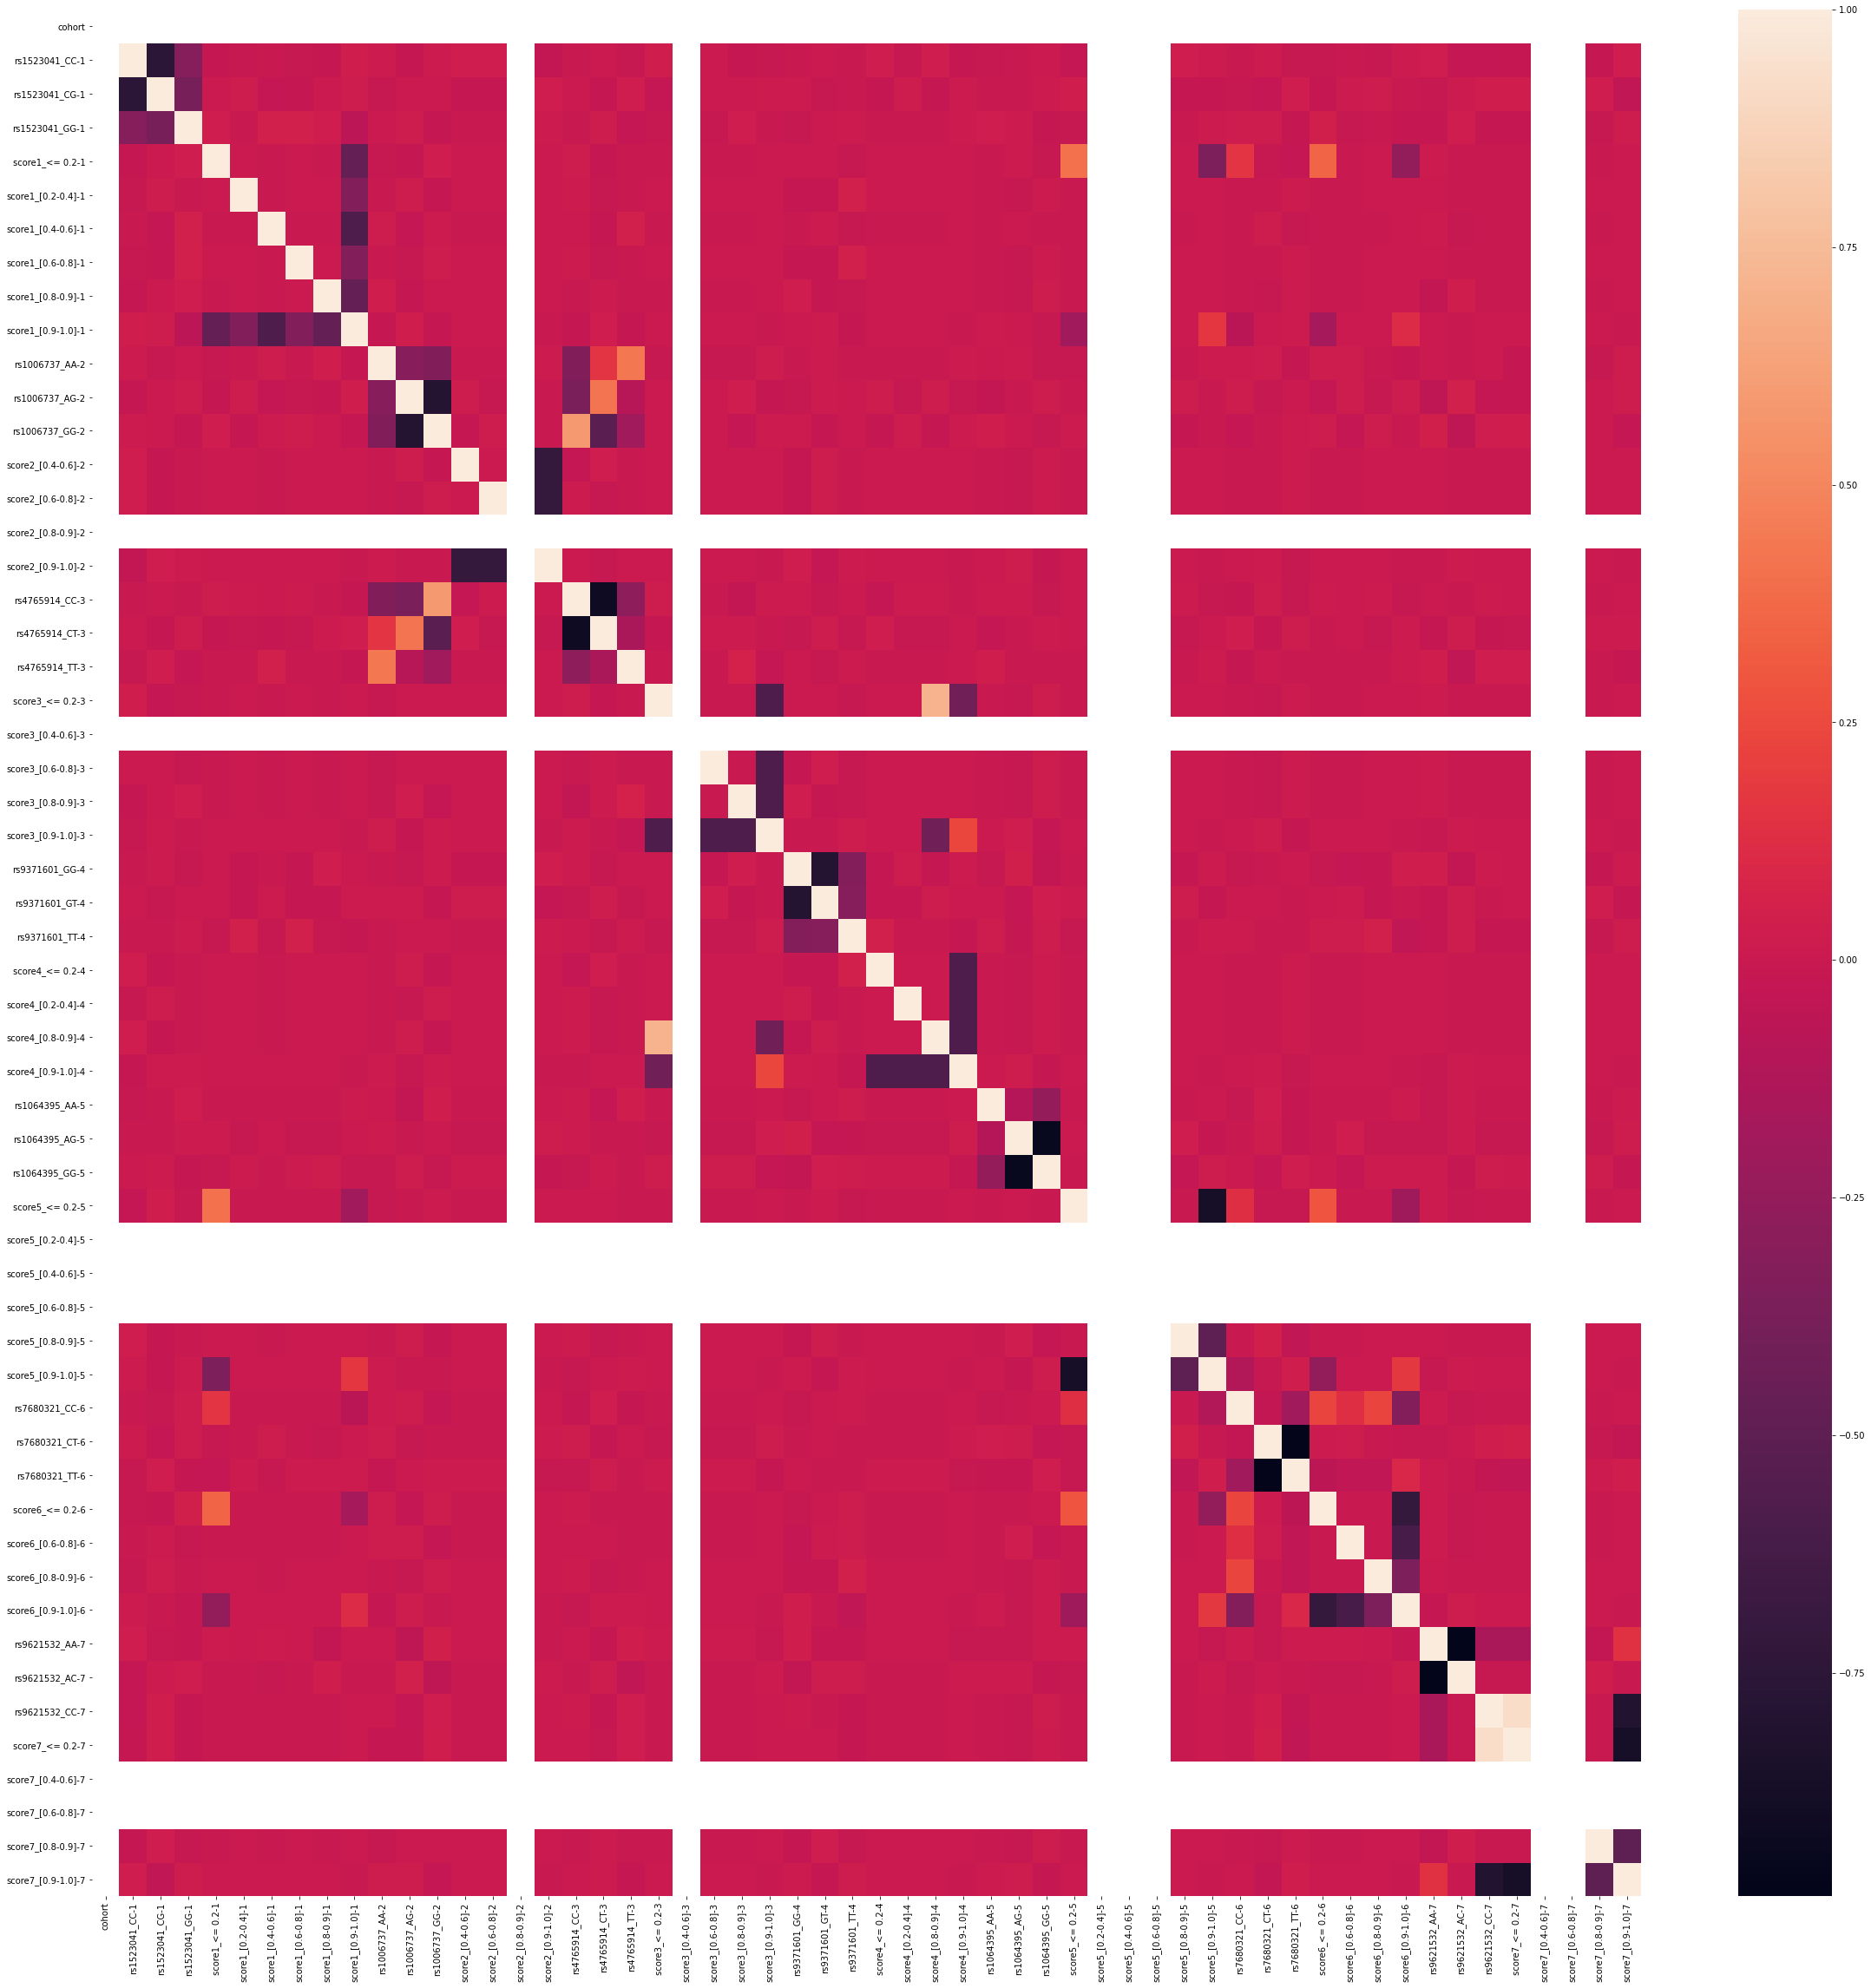

In [7]:
from matplotlib.colors import ListedColormap

corrMatrix_case = dummy_dataset_case.corr()
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
#display(corrMatrix_pos)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_case)
plt.savefig('correlation_matrix_positives_case.png', facecolor='white', transparent=False)
plt.show()

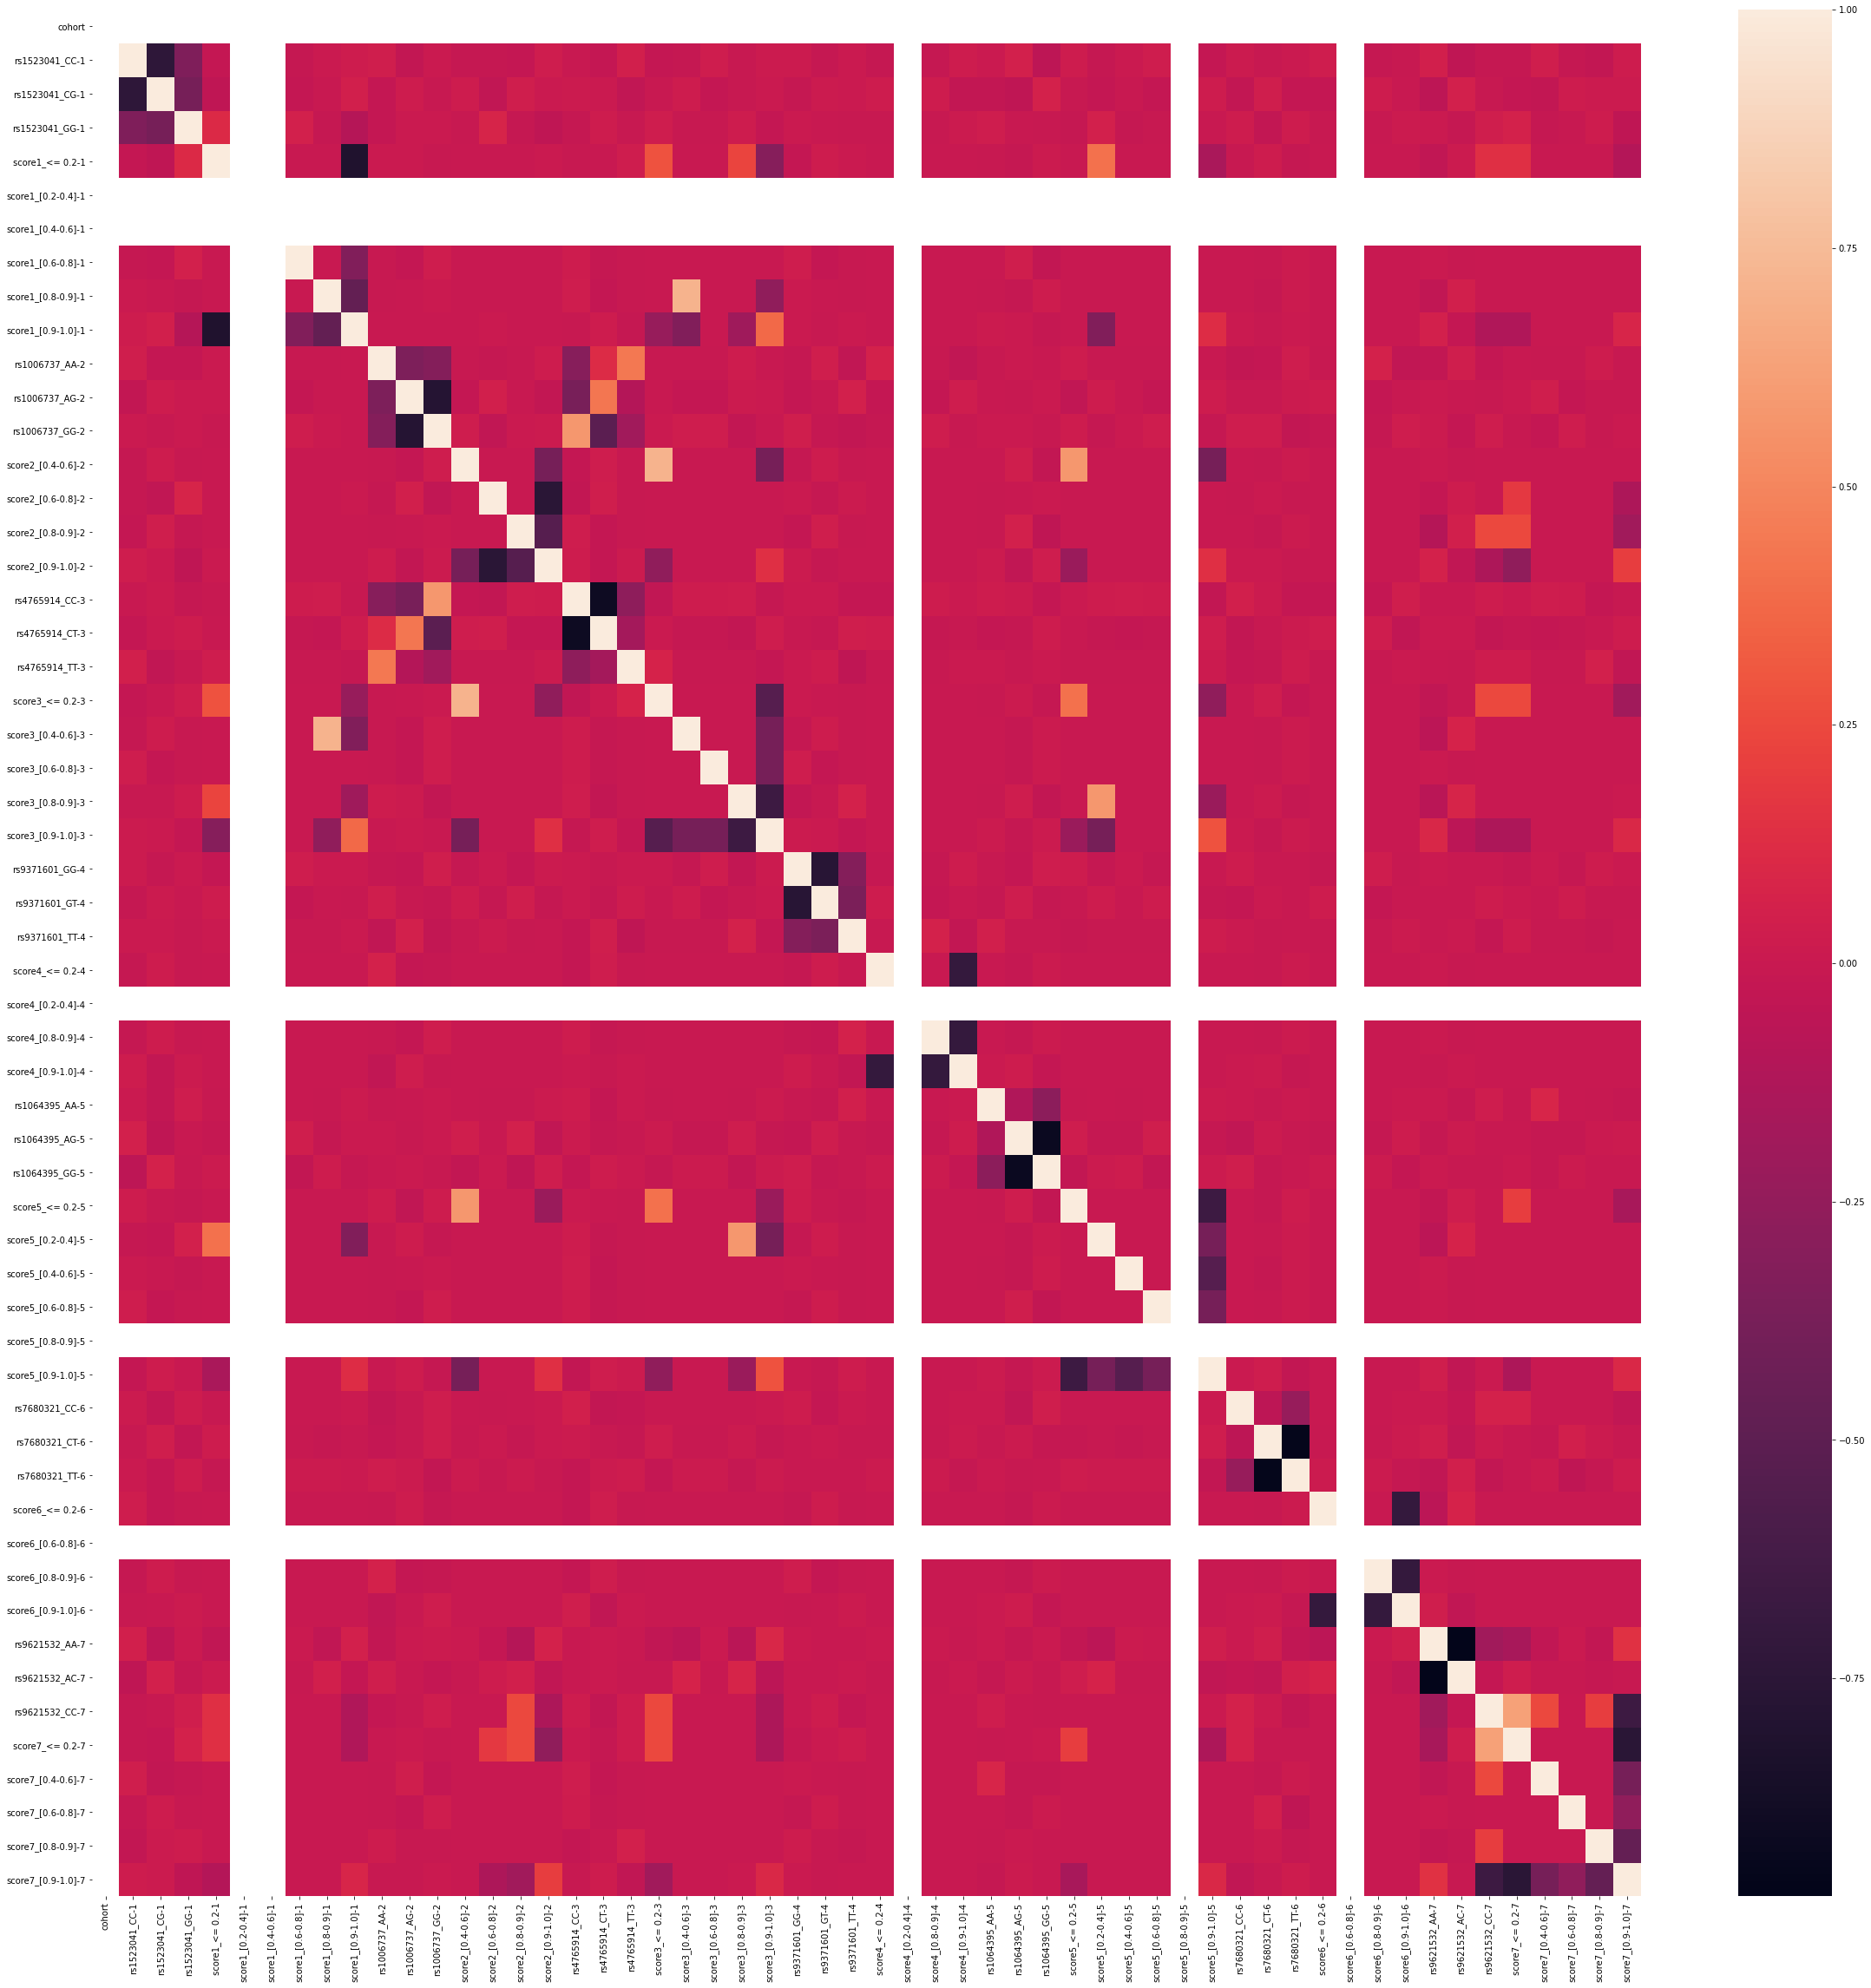

In [8]:
from matplotlib.colors import ListedColormap

corrMatrix_control = dummy_dataset_control.corr()
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
#display(corrMatrix_pos)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_control)
plt.savefig('correlation_matrix_control.png', facecolor='white', transparent=False)
plt.show()

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,score1_<= 0.2-1,score1_[0.2-0.4]-1,score1_[0.4-0.6]-1,score1_[0.6-0.8]-1,score1_[0.8-0.9]-1,score1_[0.9-1.0]-1,...,score6_[0.8-0.9]-6,score6_[0.9-1.0]-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7,score7_<= 0.2-7,score7_[0.4-0.6]-7,score7_[0.6-0.8]-7,score7_[0.8-0.9]-7,score7_[0.9-1.0]-7
cohort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs1523041_CC-1,NaN,1.000000,-0.738118,-0.340272,-0.025725,NaN,NaN,-0.018115,0.006738,0.023889,...,-0.018115,-0.006738,0.047179,-0.044035,-0.018915,-0.018915,0.039102,-0.018115,-0.031392,0.018926
rs1523041_CG-1,NaN,-0.738118,1.000000,-0.383251,-0.050041,NaN,NaN,-0.020403,0.002928,0.046321,...,0.024543,-0.002928,-0.051362,0.054359,-0.010055,-0.025973,-0.028862,0.024543,0.016568,0.016334
rs1523041_GG-1,NaN,-0.340272,-0.383251,1.000000,0.104962,NaN,NaN,0.053238,-0.013305,-0.097264,...,-0.009406,0.013305,0.006997,-0.015478,0.039910,0.062096,-0.013305,-0.009406,0.019886,-0.048676
score1_<= 0.2-1,NaN,-0.025725,-0.050041,0.104962,1.000000,NaN,NaN,-0.001228,-0.001737,-0.815882,...,-0.001228,0.001737,-0.040842,0.011936,0.141365,0.141365,-0.001737,-0.001228,-0.002128,-0.105048
score1_[0.2-0.4]-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score1_[0.4-0.6]-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score1_[0.6-0.8]-1,NaN,-0.018115,-0.020403,0.053238,-0.001228,NaN,NaN,1.000000,-0.000708,-0.332665,...,-0.000501,0.000708,0.007669,-0.007505,-0.001419,-0.001419,-0.000708,-0.000501,-0.000868,0.001880
score1_[0.8-0.9]-1,NaN,0.006738,0.002928,-0.013305,-0.001737,NaN,NaN,-0.000708,1.000000,-0.470577,...,-0.000708,0.001002,-0.040759,0.041886,-0.002007,-0.002007,-0.001002,-0.000708,-0.001228,0.002659
score1_[0.9-1.0]-1,NaN,0.023889,0.046321,-0.097264,-0.815882,NaN,NaN,-0.332665,-0.470577,1.000000,...,0.001505,-0.002129,0.050058,-0.027027,-0.114090,-0.114090,0.002129,0.001505,0.002609,0.083952


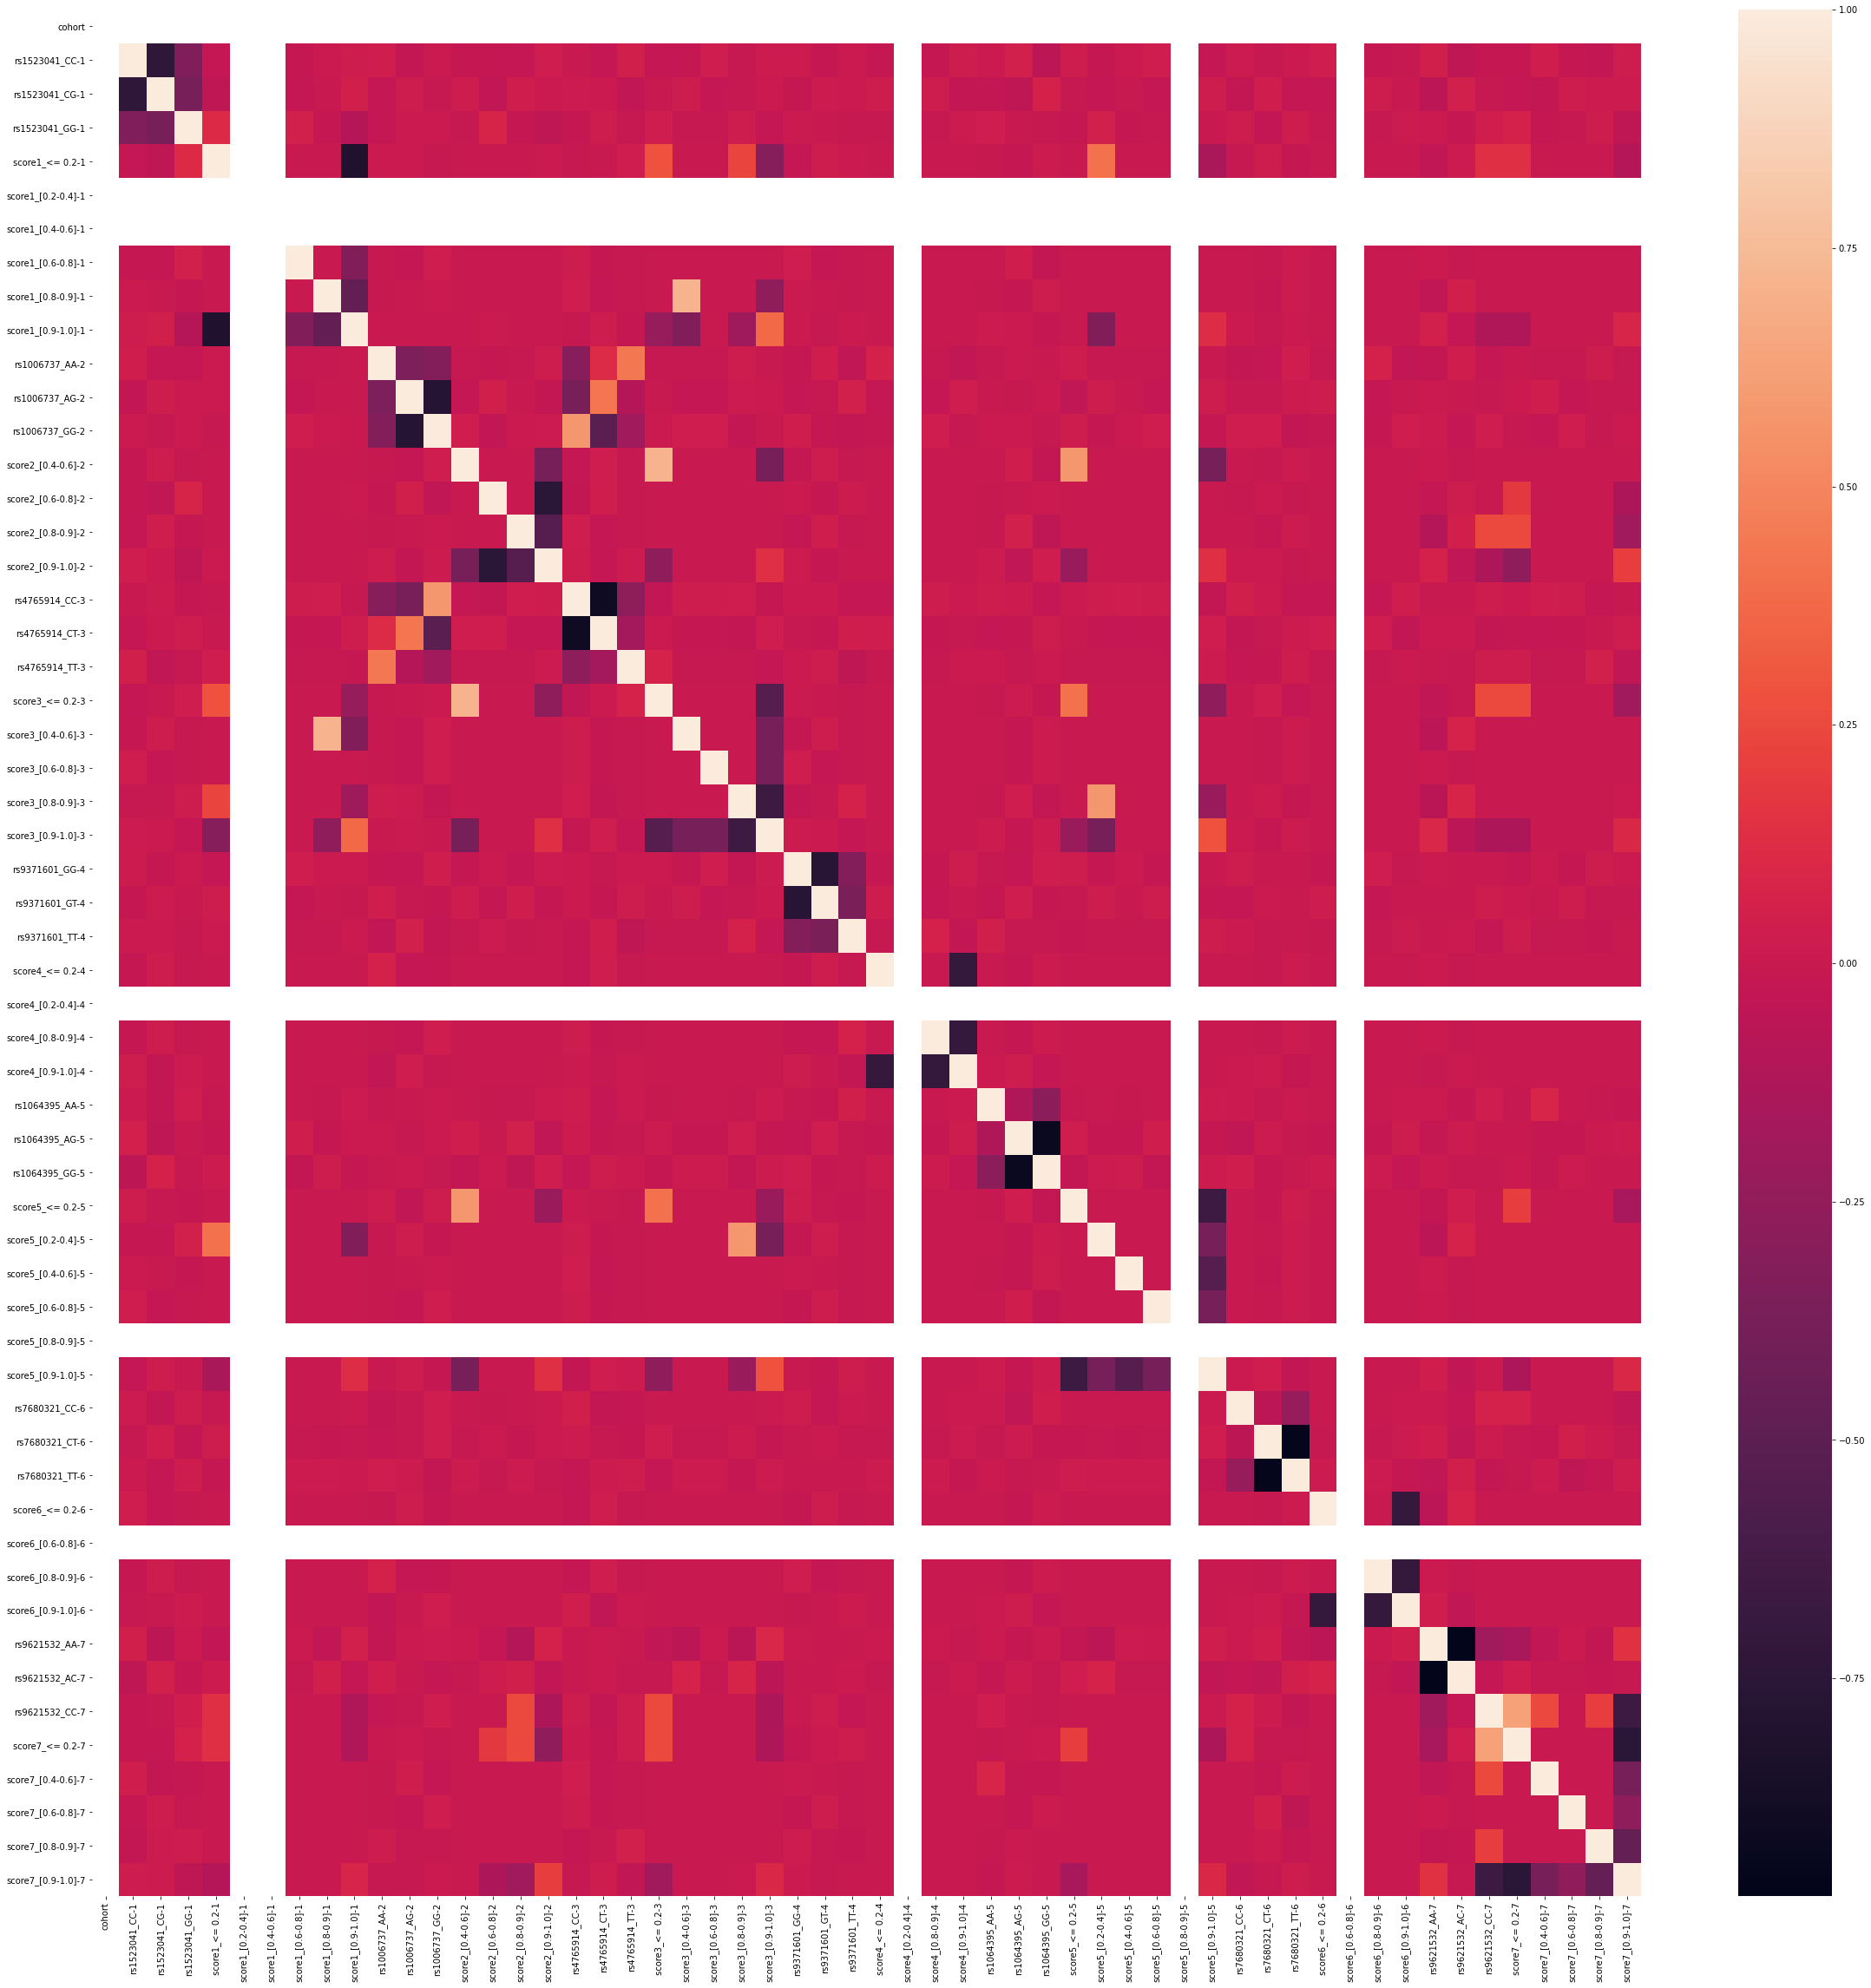

In [16]:
from matplotlib.colors import ListedColormap

corrMatrix_control_spearman = dummy_dataset_control.corr(method="spearman")
plt.figure(figsize=(40,40))

#corrMatrix_pos = corrMatrix_case[corrMatrix_case >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_control_spearman)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix_control_spearman)
plt.savefig('correlation_matrix_control_spearman.png', facecolor='white', transparent=False)
plt.show()

,cohort,rs1523041_CC-1,rs1523041_CG-1,rs1523041_GG-1,score1_<= 0.2-1,score1_[0.2-0.4]-1,score1_[0.4-0.6]-1,score1_[0.6-0.8]-1,score1_[0.8-0.9]-1,score1_[0.9-1.0]-1,...,score6_[0.8-0.9]-6,score6_[0.9-1.0]-6,rs9621532_AA-7,rs9621532_AC-7,rs9621532_CC-7,score7_<= 0.2-7,score7_[0.4-0.6]-7,score7_[0.6-0.8]-7,score7_[0.8-0.9]-7,score7_[0.9-1.0]-7
cohort,1.000000,0.013555,NaN,0.020968,0.028638,NaN,NaN,0.004100,0.005800,NaN,...,0.004100,0.018242,NaN,0.025100,0.014977,0.018589,0.024520,0.017337,0.012944,NaN
rs1523041_CC-1,0.013555,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027280,...,NaN,0.008067,0.035793,NaN,NaN,NaN,0.025134,NaN,NaN,0.021902
rs1523041_CG-1,NaN,NaN,1.000000,NaN,NaN,0.014989,NaN,NaN,0.001644,0.029958,...,0.021200,NaN,NaN,0.026132,0.014176,0.003079,NaN,0.014989,0.020853,NaN
rs1523041_GG-1,0.020968,NaN,NaN,1.000000,0.069987,NaN,0.036973,0.049334,0.008841,NaN,...,NaN,NaN,NaN,0.007756,0.009262,0.021991,NaN,NaN,0.005342,NaN
score1_<= 0.2-1,0.028638,NaN,NaN,0.069987,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.004539,0.089302,0.092578,NaN,NaN,NaN,NaN
score1_[0.2-0.4]-1,NaN,NaN,0.014989,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,0.000633,0.004588,NaN,NaN,NaN,NaN,NaN,NaN,0.000940
score1_[0.4-0.6]-1,NaN,NaN,NaN,0.036973,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,0.001097,0.007948,NaN,NaN,NaN,NaN,NaN,NaN,0.001629
score1_[0.6-0.8]-1,0.004100,NaN,NaN,0.049334,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,0.000896,0.006489,NaN,NaN,NaN,NaN,NaN,NaN,0.001330
score1_[0.8-0.9]-1,0.005800,NaN,0.001644,0.008841,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,0.001267,NaN,0.039885,NaN,NaN,NaN,NaN,NaN,0.001881
score1_[0.9-1.0]-1,NaN,0.027280,0.029958,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,0.001202,0.072054,0.026015,NaN,NaN,NaN,0.001202,0.000850,0.001902,0.046458


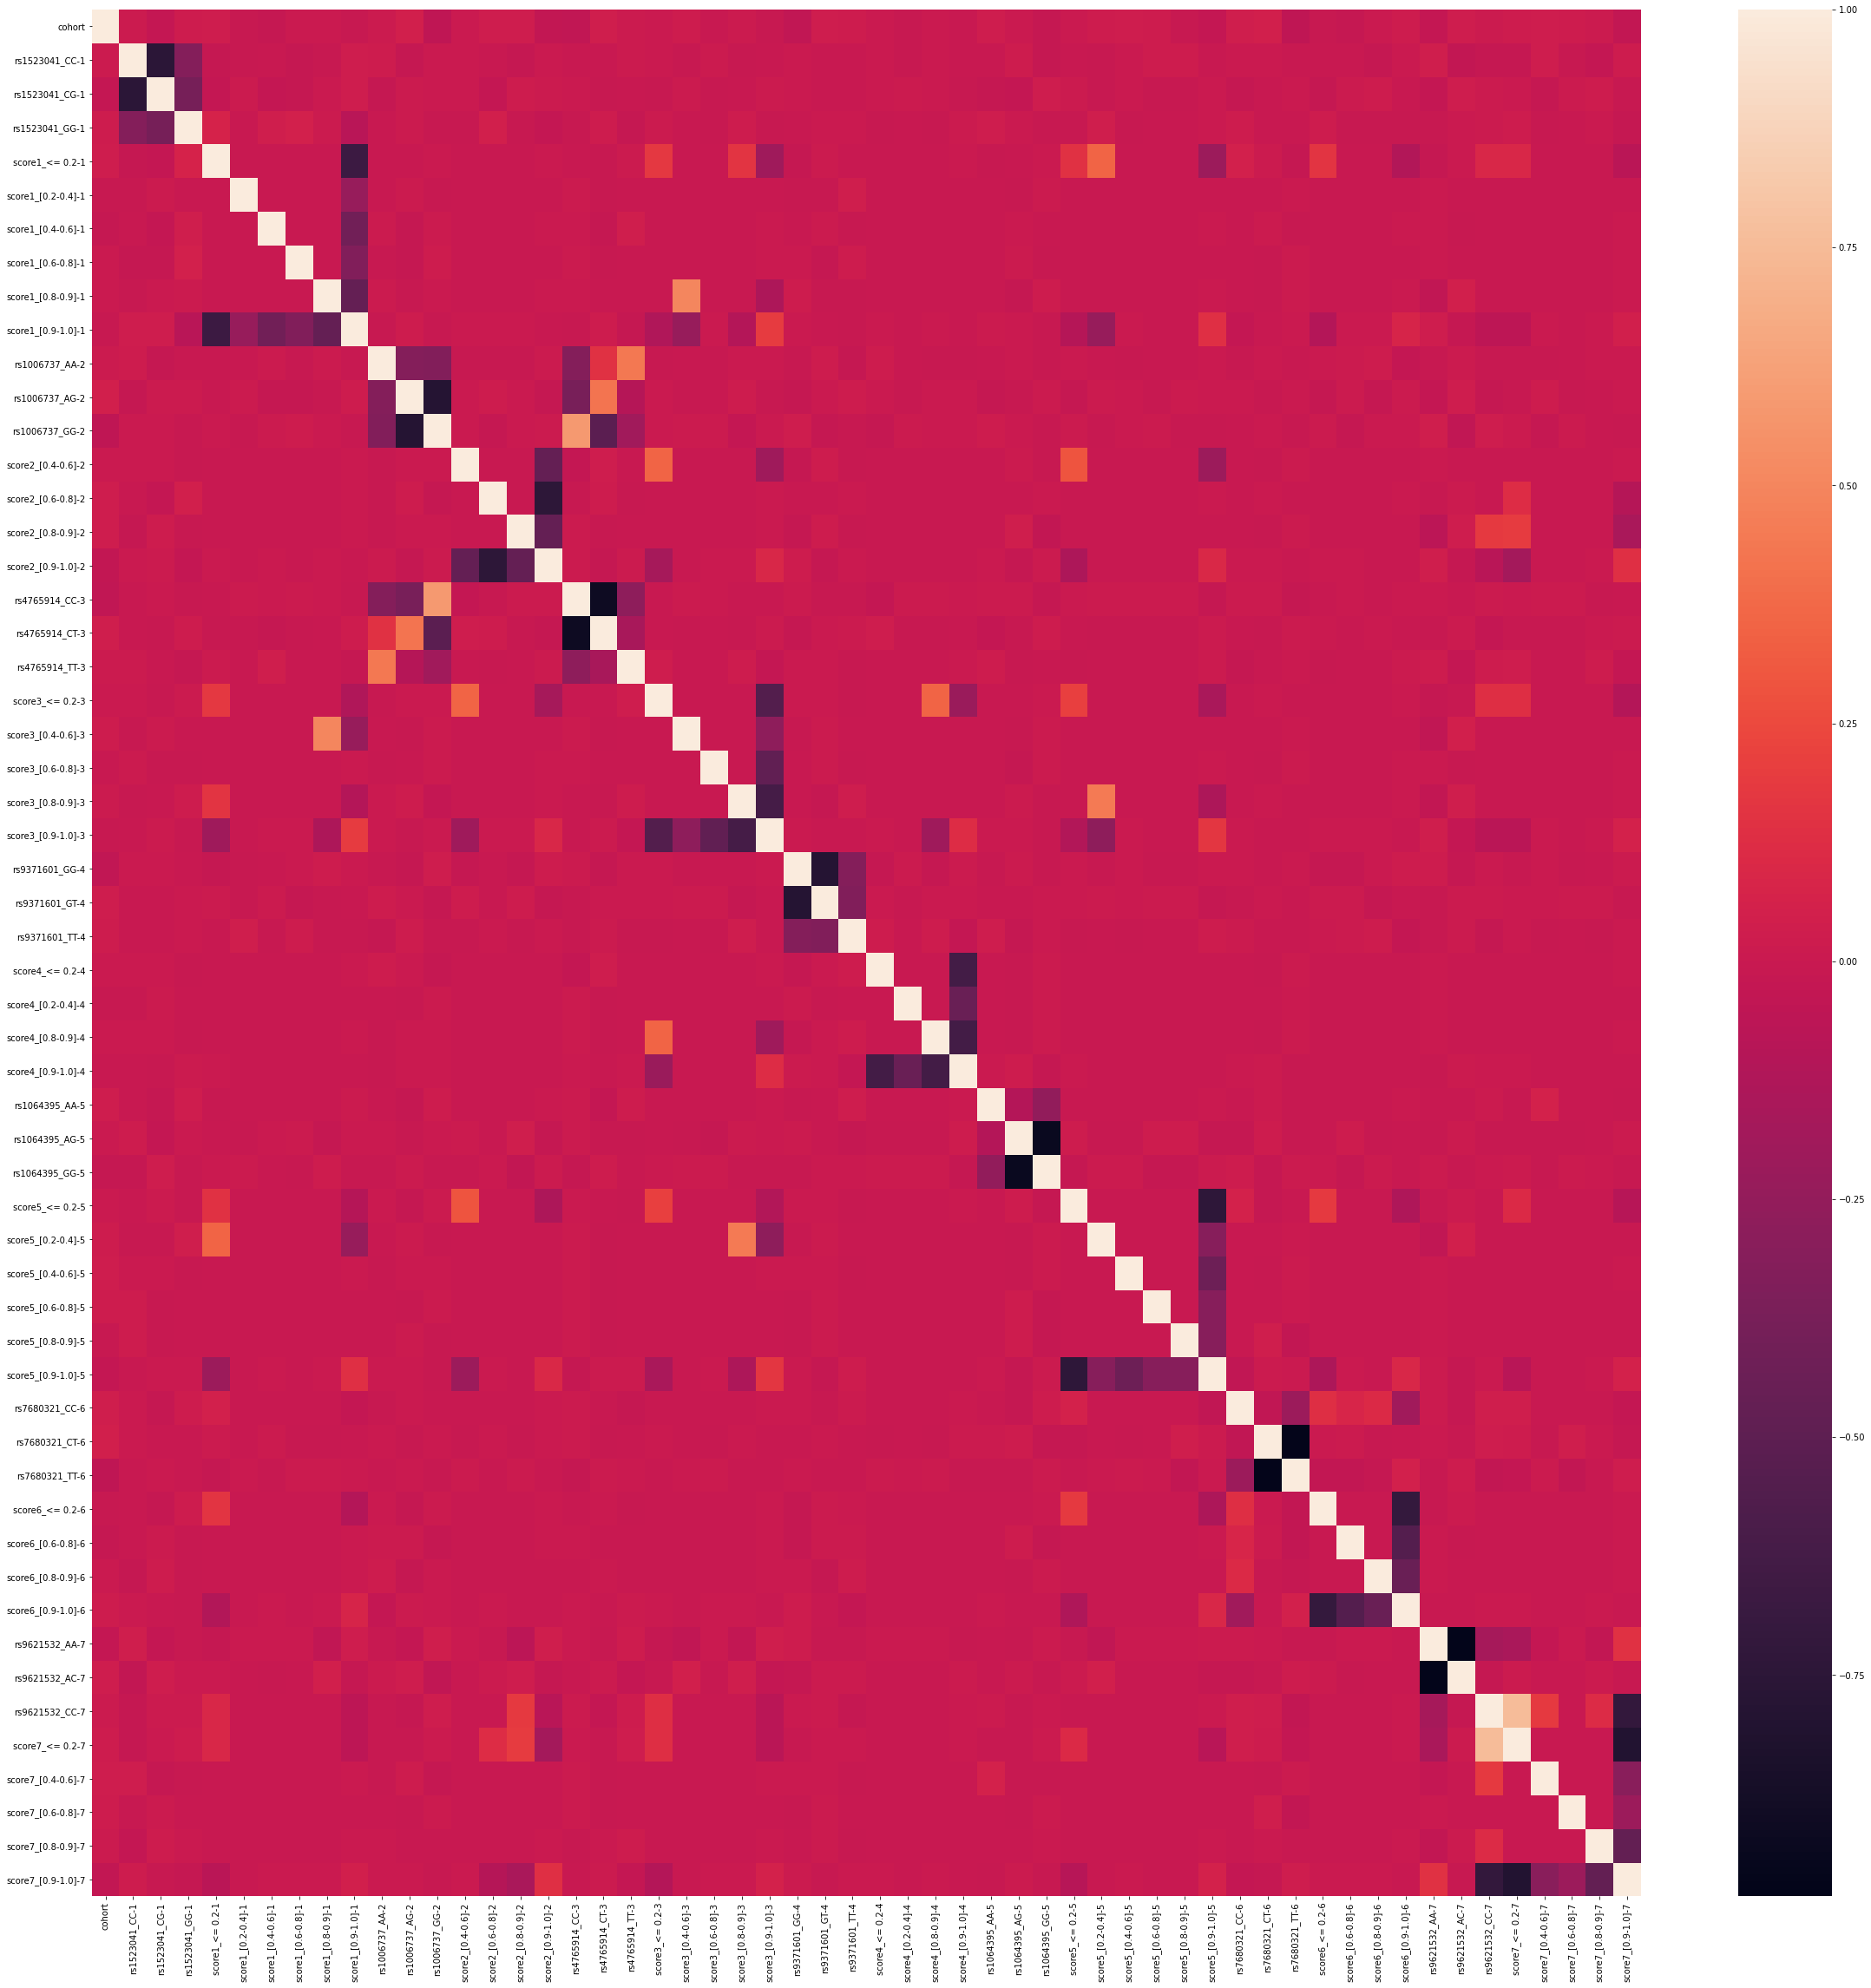

In [9]:
from matplotlib.colors import ListedColormap

corrMatrix = dummy_dataset.corr()
plt.figure(figsize=(40,40))

corrMatrix_pos = corrMatrix[corrMatrix >= 0]

#print(corrMatrix_pos.shape)
display(corrMatrix_pos)
#data = np.asarray(corrMatrix_pos).reshape(1266,1)
#sn.heatmap(data,cmap=ListedColormap(['green', 'yellow', 'red']))

sn.heatmap(corrMatrix)
plt.savefig('correlation_matrix_positives.png', facecolor='white', transparent=False)
plt.show()

In [10]:
tuples = []
test_sad = []
cohort_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples.append([(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])])

for a_tuple in tuples:
    for i in range(0, len(tuples)):
        cohort_tuples.append(a_tuple[i])
    #rs1523041_CC1_tuples.append(a_tuple[1])

for a_tuple in cohort_tuples:
        test_sad.append(a_tuple[1])

print(test_sad)


[1.0, 0.013555225538547933, -0.027859785327790407, 0.020968113219869414, 0.02863773863193204, -0.011538539194278774, -0.019989335196414992, 0.0041003176550701535, 0.0057998853952072014, -0.012320689765651729, 0.0139388504565556, 0.04105595882480007, -0.050052517479817656, 0.004100317655070032, 0.025862960893522892, 0.024520226295857116, -0.03278614790727605, -0.0419425507810572, 0.036438684619495704, 0.015273488293435042, 0.005799885395207281, 0.017336684014627075, -0.0033148814122849297, 0.012944399008646293, -0.014474410426512818, -0.04216439611255134, 0.02651466455509557, 0.02365608219411147, 0.004100317655070074, -0.011538539194278781, 0.004100317655070076, -2.5837123805316168e-05, 0.026284179622862773, 0.00820081983489076, -0.017449197701829133, 0.007104802132896369, 0.01733668401462709, 0.0245202262958572, 0.017336684014627082, -0.011538539194278783, -0.022697159551055474, 0.03466609190424345, 0.04110021754826414, -0.04894024018630895, -0.012892724761106792, -0.01998933519641495,

In [11]:
tuples_cases = []
test_sad_case = []
cohort_cases_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_case.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_cases.append([(x,y) for x,y in zip(corrMatrix_case.iloc[0].index, corrMatrix_case.iloc[i])])

for a_tuple in tuples_cases:
    for i in range(0, len(tuples_cases)):
        cohort_cases_tuples.append(a_tuple[i])

for a_tuple in cohort_cases_tuples:
    test_sad_case.append(a_tuple[1])

print(test_sad_case)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976916, -0.3111908019799921, -0.02031750847582518, -0.014364254177178536, -0.0031940933174454253, -0.01436425417717855, -0.020317508475825148, 0.030612835131793543, 0.008742903038393573, -0.016112882383987146, 0.010356431737021473, 0.02319802024781273, 0.023198020247812794, nan, -0.032812422224895436, -0.0011620267045974067, 0.0067536118936855636, -0.013044006801911317, 0.03281242222489519, nan, 0.006247456874535042, -0.02031750847582516, -0.010828133888573335, -0.004608918049135366, 0.007085355995913013, -0.0038505523215952033, 0.023198020247812635, -0.014364254177178546, 0.023198020247812614, -0.01849972600149403, -0.010160659220186979, -0.0011636007896767835, 0.0045896056140992516, -0

In [12]:
tuples_controls = []
test_sad_controls = []
cohort_controls_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_control.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_controls.append([(x,y) for x,y in zip(corrMatrix_control.iloc[0].index, corrMatrix_control.iloc[i])])

for a_tuple in tuples_controls:
    for i in range(0, len(tuples_controls)):
        cohort_controls_tuples.append(a_tuple[i])

for a_tuple in cohort_controls_tuples:
    test_sad_controls.append(a_tuple[1])

print(test_sad_case)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976916, -0.3111908019799921, -0.02031750847582518, -0.014364254177178536, -0.0031940933174454253, -0.01436425417717855, -0.020317508475825148, 0.030612835131793543, 0.008742903038393573, -0.016112882383987146, 0.010356431737021473, 0.02319802024781273, 0.023198020247812794, nan, -0.032812422224895436, -0.0011620267045974067, 0.0067536118936855636, -0.013044006801911317, 0.03281242222489519, nan, 0.006247456874535042, -0.02031750847582516, -0.010828133888573335, -0.004608918049135366, 0.007085355995913013, -0.0038505523215952033, 0.023198020247812635, -0.014364254177178546, 0.023198020247812614, -0.01849972600149403, -0.010160659220186979, -0.0011636007896767835, 0.0045896056140992516, -0

In [17]:
tuples_case_spearman = []
test_sad_case_spearman = []
cohort_case_tuples_spearman = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_case_spearman.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_case_spearman.append([(x,y) for x,y in zip(corrMatrix_case_spearman.iloc[0].index, corrMatrix_case_spearman.iloc[i])])

for a_tuple in tuples_case_spearman:
    for i in range(0, len(tuples_case_spearman)):
        cohort_case_tuples_spearman.append(a_tuple[i])

for a_tuple in cohort_case_tuples_spearman:
    test_sad_case_spearman.append(a_tuple[1])

print(test_sad_case_spearman)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976931, -0.3111908019799922, -0.020317508475825186, -0.014364254177178569, -0.0031940933174453992, -0.014364254177178569, -0.020317508475825186, 0.03061283513179346, 0.008742903038393689, -0.016112882383987188, 0.010356431737021351, 0.023198020247812777, 0.023198020247812777, nan, -0.03281242222489538, -0.0011620267045973937, 0.006753611893685552, -0.013044006801911331, 0.03281242222489538, nan, 0.0062474568745350964, -0.020317508475825186, -0.010828133888573446, -0.004608918049135392, 0.007085355995913095, -0.003850552321595176, 0.023198020247812777, -0.014364254177178569, 0.023198020247812777, -0.018499726001493716, -0.010160659220187045, -0.0011636007896767585, 0.004589605614099207, -

In [22]:
tuples_control_spearman = []
test_sad_control_spearman = []
cohort_control_tuples_spearman = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_control_spearman.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_control_spearman.append([(x,y) for x,y in zip(corrMatrix_control_spearman.iloc[0].index, corrMatrix_control_spearman.iloc[i])])

for a_tuple in tuples_control_spearman:
    for i in range(0, len(tuples_control_spearman)):
        cohort_control_tuples_spearman.append(a_tuple[i])

for a_tuple in cohort_control_tuples_spearman:
    test_sad_control_spearman.append(a_tuple[1])

print(test_sad_control_spearman)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7381181336289996, -0.34027213897694064, -0.0257249511864825, nan, nan, -0.018115301821280013, 0.006738390688050517, 0.02388864194943276, 0.03978531829608704, -0.029584901210801314, 0.0033123510466263758, -0.018115301821280013, -0.013361773357493497, -0.025625322280038266, 0.030679906789276137, -0.00032709214572473406, -0.02095632566981775, 0.04782465198380094, -0.025625322280038266, -0.018115301821280013, 0.027642439062307178, -0.004960863912731605, 0.013359066505305037, 0.013183083737378804, -0.01597876076081245, 0.0044574580590392154, -0.018115301821280013, nan, -0.018115301821280013, 0.025625322280038266, 0.008385128468427146, 0.05412286587204779, -0.055610332307756055, 0.02147061901430239, -0.

In [13]:
tuples_v2 = []
for col in corrMatrix.columns:
    for i in range(0, len(corrMatrix.iloc[0].index)):
        tuples_v2.append((corrMatrix.iloc[0].index[i],col ))

sorted_list_v1 = sorted(tuples_v2)
print(sorted_list_v1)

[('cohort', 'cohort'), ('cohort', 'rs1006737_AA-2'), ('cohort', 'rs1006737_AG-2'), ('cohort', 'rs1006737_GG-2'), ('cohort', 'rs1064395_AA-5'), ('cohort', 'rs1064395_AG-5'), ('cohort', 'rs1064395_GG-5'), ('cohort', 'rs1523041_CC-1'), ('cohort', 'rs1523041_CG-1'), ('cohort', 'rs1523041_GG-1'), ('cohort', 'rs4765914_CC-3'), ('cohort', 'rs4765914_CT-3'), ('cohort', 'rs4765914_TT-3'), ('cohort', 'rs7680321_CC-6'), ('cohort', 'rs7680321_CT-6'), ('cohort', 'rs7680321_TT-6'), ('cohort', 'rs9371601_GG-4'), ('cohort', 'rs9371601_GT-4'), ('cohort', 'rs9371601_TT-4'), ('cohort', 'rs9621532_AA-7'), ('cohort', 'rs9621532_AC-7'), ('cohort', 'rs9621532_CC-7'), ('cohort', 'score1_<= 0.2-1'), ('cohort', 'score1_[0.2-0.4]-1'), ('cohort', 'score1_[0.4-0.6]-1'), ('cohort', 'score1_[0.6-0.8]-1'), ('cohort', 'score1_[0.8-0.9]-1'), ('cohort', 'score1_[0.9-1.0]-1'), ('cohort', 'score2_[0.4-0.6]-2'), ('cohort', 'score2_[0.6-0.8]-2'), ('cohort', 'score2_[0.8-0.9]-2'), ('cohort', 'score2_[0.9-1.0]-2'), ('cohort',

In [30]:
tuples_v2_case = []
for col in corrMatrix_case.columns:
    for i in range(0, len(corrMatrix_case.iloc[0].index)):
        tuples_v2_case.append((corrMatrix_case.iloc[0].index[i],col ))

In [36]:
tuples_v2_control = []
for col in corrMatrix_control.columns:
    for i in range(0, len(corrMatrix_control.iloc[0].index)):
        tuples_v2_control.append((corrMatrix_control.iloc[0].index[i],col ))

In [19]:
tuples_v2_case_spearman = []
for col in corrMatrix_case_spearman.columns:
    for i in range(0, len(corrMatrix_case_spearman.iloc[0].index)):
        tuples_v2_case_spearman.append((corrMatrix_case_spearman.iloc[0].index[i],col ))

In [20]:
df_case_spearman = pd.DataFrame(index=range(len(tuples_v2_case_spearman)), columns=['correlation'])

df_case_spearman.index = tuples_v2_case_spearman
df_case_spearman['correlation'] = test_sad_case_spearman


case_spearman_study = df_case_spearman.dropna()
case_spearman_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_GG-1, rs1523041_CC-1)",-0.311191
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.020318
"(score1_[0.2-0.4]-1, rs1523041_CC-1)",-0.014364
...,...
"(rs9621532_AC-7, score7_[0.9-1.0]-7)",-0.007129
"(rs9621532_CC-7, score7_[0.9-1.0]-7)",-0.801293
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.865736
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.499500


In [21]:
case_spearman_study[(case_spearman_study['correlation'] > 0.5) & (case_spearman_study['correlation'] < 1.0)]

,correlation
"(rs4765914_CC-3, rs1006737_GG-2)",0.581769
"(rs1006737_GG-2, rs4765914_CC-3)",0.581769
"(score4_[0.8-0.9]-4, score3_<= 0.2-3)",0.706989
"(score3_<= 0.2-3, score4_[0.8-0.9]-4)",0.706989
"(score7_<= 0.2-7, rs9621532_CC-7)",0.925666
"(rs9621532_CC-7, score7_<= 0.2-7)",0.925666


In [37]:
df_control = pd.DataFrame(index=range(len(tuples_v2_control)), columns=['correlation'])

df_control.index = tuples_v2_control
df_control['correlation'] = test_sad_controls


control_study = df_control.dropna()
control_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.738118
"(rs1523041_GG-1, rs1523041_CC-1)",-0.340272
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.025725
"(score1_[0.6-0.8]-1, rs1523041_CC-1)",-0.018115
...,...
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.754788
"(score7_[0.4-0.6]-7, score7_[0.9-1.0]-7)",-0.376827
"(score7_[0.6-0.8]-7, score7_[0.9-1.0]-7)",-0.266390
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.461632


In [32]:
df_case = pd.DataFrame(index=range(len(tuples_v2_case)), columns=['correlation'])

df_case.index = tuples_v2_case
df_case['correlation'] = test_sad_case


cases_study = df_case.dropna()
cases_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_GG-1, rs1523041_CC-1)",-0.311191
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.020318
"(score1_[0.2-0.4]-1, rs1523041_CC-1)",-0.014364
...,...
"(rs9621532_AC-7, score7_[0.9-1.0]-7)",-0.007129
"(rs9621532_CC-7, score7_[0.9-1.0]-7)",-0.801293
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.865736
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.499500


In [48]:
cases_study[(cases_study['correlation'] > 0.5) & (cases_study['correlation'] < 1.0)]

,correlation
"(score5_<= 0.2-5, score1_<= 0.2-1)",0.407772
"(rs7680321_CC-6, score1_<= 0.2-1)",0.160731
"(score6_<= 0.2-6, score1_<= 0.2-1)",0.352964
"(score5_[0.9-1.0]-5, score1_[0.9-1.0]-1)",0.165025
"(score6_[0.9-1.0]-6, score1_[0.9-1.0]-1)",0.115351
"(rs4765914_CT-3, rs1006737_AA-2)",0.159280
"(rs4765914_TT-3, rs1006737_AA-2)",0.437287
"(rs4765914_CT-3, rs1006737_AG-2)",0.420975
"(rs4765914_CC-3, rs1006737_GG-2)",0.581769
"(rs1006737_GG-2, rs4765914_CC-3)",0.581769


In [46]:
control = control_study[(control_study['correlation'] > 0.5) & (control_study['correlation'] < 1.0)]

control['correlation'].sort_values()

(score5_<= 0.2-5, score2_[0.4-0.6]-2)       0.577061
(score5_[0.2-0.4]-5, score3_[0.8-0.9]-3)    0.577061
(score2_[0.4-0.6]-2, score5_<= 0.2-5)       0.577061
(score3_[0.8-0.9]-3, score5_[0.2-0.4]-5)    0.577061
(rs4765914_CC-3, rs1006737_GG-2)            0.581903
(rs1006737_GG-2, rs4765914_CC-3)            0.581903
(score7_<= 0.2-7, rs9621532_CC-7)           0.623492
(rs9621532_CC-7, score7_<= 0.2-7)           0.623492
(score3_[0.4-0.6]-3, score1_[0.8-0.9]-1)    0.706930
(score3_<= 0.2-3, score2_[0.4-0.6]-2)       0.706930
(score2_[0.4-0.6]-2, score3_<= 0.2-3)       0.706930
(score1_[0.8-0.9]-1, score3_[0.4-0.6]-3)    0.706930
Name: correlation, dtype: float64

In [49]:
cases_neg = cases_study[(cases_study['correlation'] < -0.5) & (cases_study['correlation'] > -1.0)]
cases_neg['correlation'].sort_values()

(rs9621532_AA-7, rs9621532_AC-7)           -0.985495
(rs9621532_AC-7, rs9621532_AA-7)           -0.985495
(rs7680321_CT-6, rs7680321_TT-6)           -0.975623
(rs7680321_TT-6, rs7680321_CT-6)           -0.975623
(rs1064395_AG-5, rs1064395_GG-5)           -0.940934
(rs1064395_GG-5, rs1064395_AG-5)           -0.940934
(rs4765914_CT-3, rs4765914_CC-3)           -0.912130
(rs4765914_CC-3, rs4765914_CT-3)           -0.912130
(score5_<= 0.2-5, score5_[0.9-1.0]-5)      -0.865881
(score5_[0.9-1.0]-5, score5_<= 0.2-5)      -0.865881
(score7_<= 0.2-7, score7_[0.9-1.0]-7)      -0.865736
(score7_[0.9-1.0]-7, score7_<= 0.2-7)      -0.865736
(score7_[0.9-1.0]-7, rs9621532_CC-7)       -0.801293
(rs9621532_CC-7, score7_[0.9-1.0]-7)       -0.801293
(rs9371601_GT-4, rs9371601_GG-4)           -0.795436
(rs9371601_GG-4, rs9371601_GT-4)           -0.795436
(rs1006737_GG-2, rs1006737_AG-2)           -0.793477
(rs1006737_AG-2, rs1006737_GG-2)           -0.793477
(rs1523041_CG-1, rs1523041_CC-1)           -0.

In [50]:
control_neg = control_study[(control_study['correlation'] < -0.5) & (control_study['correlation'] > -1.0)]

control_neg['correlation'].sort_values()

(rs9621532_AC-7, rs9621532_AA-7)           -0.978581
(rs9621532_AA-7, rs9621532_AC-7)           -0.978581
(rs7680321_TT-6, rs7680321_CT-6)           -0.957782
(rs7680321_CT-6, rs7680321_TT-6)           -0.957782
(rs1064395_GG-5, rs1064395_AG-5)           -0.922343
(rs1064395_AG-5, rs1064395_GG-5)           -0.922343
(rs4765914_CC-3, rs4765914_CT-3)           -0.903457
(rs4765914_CT-3, rs4765914_CC-3)           -0.903457
(score1_[0.9-1.0]-1, score1_<= 0.2-1)      -0.815882
(score1_<= 0.2-1, score1_[0.9-1.0]-1)      -0.815882
(rs1006737_GG-2, rs1006737_AG-2)           -0.778701
(rs1006737_AG-2, rs1006737_GG-2)           -0.778701
(rs9371601_GT-4, rs9371601_GG-4)           -0.769756
(rs9371601_GG-4, rs9371601_GT-4)           -0.769756
(score2_[0.9-1.0]-2, score2_[0.6-0.8]-2)   -0.755360
(score2_[0.6-0.8]-2, score2_[0.9-1.0]-2)   -0.755360
(score7_[0.9-1.0]-7, score7_<= 0.2-7)      -0.754788
(score7_<= 0.2-7, score7_[0.9-1.0]-7)      -0.754788
(rs1523041_CG-1, rs1523041_CC-1)           -0.

In [9]:
df = pd.DataFrame(index=range(len(tuples_v2)), columns=['correlation'])

df.index = tuples_v2
df['correlation'] = test_sad
df

,correlation
"(cohort, cohort)",1.000000
"(rs1523041_CC-1, cohort)",0.013555
"(rs1523041_CG-1, cohort)",-0.027860
"(rs1523041_GG-1, cohort)",0.020968
"(score1_<= 0.2-1, cohort)",0.028638
...,...
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.797084
"(score7_[0.4-0.6]-7, score7_[0.9-1.0]-7)",-0.300907
"(score7_[0.6-0.8]-7, score7_[0.9-1.0]-7)",-0.212752
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.475919


In [10]:
df[(df['correlation'] > 0.5) & (df['correlation'] < 1.0)]

,correlation
"(rs4765914_CC-3, rs1006737_GG-2)",0.582610
"(rs1006737_GG-2, rs4765914_CC-3)",0.582610
"(score7_<= 0.2-7, rs9621532_CC-7)",0.758373
"(rs9621532_CC-7, score7_<= 0.2-7)",0.758373


In [10]:
df[(df['correlation'] < -0.7) & (df['correlation'] > -1.0)]

,correlation
"(rs1523041_CG-1, rs1523041_CC-1)",-0.751000
"(rs1523041_CC-1, rs1523041_CG-1)",-0.751000
"(rs1006737_GG-2, rs1006737_AG-2)",-0.787939
"(rs1006737_AG-2, rs1006737_GG-2)",-0.787939
"(score2_[0.9-1.0]-2, score2_[0.6-0.8]-2)",-0.745057
"(score2_[0.6-0.8]-2, score2_[0.9-1.0]-2)",-0.745057
"(rs4765914_CT-3, rs4765914_CC-3)",-0.908696
"(rs4765914_CC-3, rs4765914_CT-3)",-0.908696
"(rs9371601_GT-4, rs9371601_GG-4)",-0.785334
"(rs9371601_GG-4, rs9371601_GT-4)",-0.785334


In [57]:
#split dataset in features and target variable
feature_cols = ['rs1523041_CC-1', 'rs1523041_CG-1', 'rs1523041_GG-1',
                'score1_<= 0.2-1', 'score1_[0.2-0.4]-1', 'score1_[0.4-0.6]-1',
                'score1_[0.6-0.8]-1', 'score1_[0.8-0.9]-1', 'score1_[0.9-1.0]-1',
                'rs1006737_AA-2', 'rs1006737_AG-2', 'rs1006737_GG-2',
                'score2_[0.4-0.6]-2', 'score2_[0.6-0.8]-2', 'score2_[0.8-0.9]-2',
                'score2_[0.9-1.0]-2', 'rs4765914_CC-3', 'rs4765914_CT-3',
                'rs4765914_TT-3', 'score3_<= 0.2-3', 'score3_[0.4-0.6]-3',
                'score3_[0.6-0.8]-3', 'score3_[0.8-0.9]-3', 'score3_[0.9-1.0]-3',
                'rs9371601_GG-4', 'rs9371601_GT-4', 'rs9371601_TT-4', 'score4_<= 0.2-4',
                'score4_[0.2-0.4]-4', 'score4_[0.8-0.9]-4', 'score4_[0.9-1.0]-4',
                'rs1064395_AA-5', 'rs1064395_AG-5', 'rs1064395_GG-5', 'score5_<= 0.2-5',
                'score5_[0.2-0.4]-5', 'score5_[0.4-0.6]-5', 'score5_[0.6-0.8]-5',
                'score5_[0.8-0.9]-5', 'score5_[0.9-1.0]-5', 'rs7680321_CC-6',
                'rs7680321_CT-6', 'rs7680321_TT-6', 'score6_<= 0.2-6',
                'score6_[0.6-0.8]-6', 'score6_[0.8-0.9]-6', 'score6_[0.9-1.0]-6',
                'rs9621532_AA-7', 'rs9621532_AC-7', 'rs9621532_CC-7', 'score7_<= 0.2-7',
                'score7_[0.4-0.6]-7', 'score7_[0.6-0.8]-7', 'score7_[0.8-0.9]-7',
                'score7_[0.9-1.0]-7']
X_gen1 = dummy_dataset[feature_cols] # Features
y_gen1 = dummy_dataset.cohort # Target variable

X_train1,X_test1,y_train1,y_test1=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train1.to_csv("X_train1.csv")
X_test1.to_csv("X_test1.csv")
y_train1.to_csv("y_train1.csv")
y_test1.to_csv("y_test1.csv")
X_train2,X_test2,y_train2,y_test2=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train2.to_csv("X_train2.csv")
X_test2.to_csv("X_test2.csv")
y_train2.to_csv("y_train2.csv")
y_test2.to_csv("y_test2.csv")
X_train3,X_test3,y_train3,y_test3=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train3.to_csv("X_train3.csv")
X_test3.to_csv("X_test3.csv")
y_train3.to_csv("y_train3.csv")
y_test3.to_csv("y_test3.csv")
X_train4,X_test4,y_train4,y_test4=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train4.to_csv("X_train4.csv")
X_test4.to_csv("X_test4.csv")
y_train4.to_csv("y_train4.csv")
y_test4.to_csv("y_test4.csv")
X_train5,X_test5,y_train5,y_test5=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train5.to_csv("X_train5.csv")
X_test5.to_csv("X_test5.csv")
y_train5.to_csv("y_train5.csv")
y_test5.to_csv("y_test5.csv")
X_train6,X_test6,y_train6,y_test6=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train6.to_csv("X_train6.csv")
X_test6.to_csv("X_test6.csv")
y_train6.to_csv("y_train6.csv")
y_test6.to_csv("y_test6.csv")
X_train7,X_test7,y_train7,y_test7=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train7.to_csv("X_train7.csv")
X_test7.to_csv("X_test7.csv")
y_train7.to_csv("y_train7.csv")
y_test7.to_csv("y_test7.csv")
X_train8,X_test8,y_train8,y_test8=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train8.to_csv("X_train8.csv")
X_test8.to_csv("X_test8.csv")
y_train8.to_csv("y_train8.csv")
y_test8.to_csv("y_test8.csv")
X_train9,X_test9,y_train9,y_test9=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train9.to_csv("X_train9.csv")
X_test9.to_csv("X_test9.csv")
y_train9.to_csv("y_train9.csv")
y_test9.to_csv("y_test9.csv")
X_train10,X_test10,y_train10,y_test10=train_test_split(X_gen1,y_gen1,test_size=0.20)
X_train10.to_csv("X_train10.csv")
X_test10.to_csv("X_test10.csv")
y_train10.to_csv("y_train10.csv")
y_test10.to_csv("y_test10.csv")


In [32]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
     'solver' : ['liblinear'],
     'class_weight' : ['balanced'],
     'C' : [0.25,2,0.5,1.5]
     }
]

#do a correlation matrix 
# descrição estatística dos dados 
# polinimial (grau 2,3,4,5)
def polynomial_regression(degree_number, xtrain, ytrain, xtest, ytest):
    poly = PolynomialFeatures(degree = degree_number, interaction_only=False, include_bias=False)
    x_polytrain = poly.fit_transform(xtrain)
    x_polytest = poly.fit_transform(xtest)
    lr = LogisticRegression(class_weight='balanced')
    lr.fit(x_polytrain,ytrain)
    predict_train = lr.predict(x_polytrain)
    predict_test = lr.predict(x_polytest)
    cm = confusion_matrix(ytest, predict_test)
    return cm
# logaritmica 

#10 fold cross validation
def predictlogisticregression(xtrain, ytrain, xtest, ytest, param_grid_predict):
    logreg = LogisticRegression()
    logreg_cv=GridSearchCV(logreg,param_grid_predict,cv=10)
    logreg_cv.fit(xtrain,ytrain)
    predict = logreg_cv.predict(xtest)
    cm = confusion_matrix(ytest, predict)
    return cm

def calculate_precision(prediction):
    return prediction[1, 1]/(prediction[1, 1] + prediction[0, 1])

def calculate_recall(prediction):
    return prediction[1, 1]/(prediction[1, 1] + prediction[1, 0])

def calculate_error_rate(prediction):
    return (prediction[0, 1] + prediction[1,0])/(prediction[0, 0] + prediction[0, 1]+ prediction[1, 1] + prediction[1, 0])

def calculate_accuracy(prediction):
    return (prediction[0, 0] + prediction[1,1])/(prediction[0, 0] + prediction[0, 1]+ prediction[1, 1] + prediction[1, 0])

def confusion_matrix_info(prediction):
    print("tn: "+ str(prediction[0, 0]) ,"fp: "+ str(prediction[0, 1])+ " fn: " + str(prediction[1, 0]) + " tp: " + str(prediction[1, 1]))

def true_positives(prediction):
    return prediction[1,1]

def true_negatives(prediction):
    return prediction[0,0]

def false_positives(prediction):
    return prediction[0,1]

def false_negatives(prediction):
    return prediction[1,0]

def print_info(prediction, snp_studied, fold):
    print("----------------------------------------------------------")
    print("Fold: " + str(fold))
    print("SNP: " + str(snp_studied))
    print("-------------------Confusion Matrix-----------------------")
    confusion_matrix_info(prediction)
    print("---------------------Metrics------------------------------")
    print(f'Precision: {calculate_precision(prediction)*100:.2f}%')
    print(f'Recall: {calculate_recall(prediction)*100:.2f}%')
    print(f'Error Rate : {calculate_error_rate(prediction)*100:.2f}%')
    print(f'Accuracy : {calculate_accuracy(prediction) * 100:.2f}%')

def print_metrics_info(sum_tn, sum_tp, sum_fn, sum_fp, sum_precision, sum_recall, sum_error, sum_accuracy):
    print(f'Average True negatives: {(sum_tn/10)}')
    print(f'Average True positives: {(sum_tp/10)}')
    print(f'Average False negatives: {(sum_fn/10)}')
    print(f'Average False positives: {(sum_fp/10)}')
    print("-------------------------------------")
    print(f'Average Precison: {(sum_precision/10)*100:.2f}%')
    print(f'Average Recall: {(sum_recall/10)*100:.2f}%')
    print(f'Average Error Rate: {(sum_error/10)*100:.2f}%')
    print(f'Average Accuracy: {(sum_accuracy/10)*100:.2f}%')

SNP study: rs1523041

In [17]:
#split dataset in features and target variable
feature_cols_exp1 = ['rs1523041_CC-1', 'rs1523041_CG-1', 'rs1523041_GG-1',
                'score1_<= 0.2-1', 'score1_[0.2-0.4]-1', 'score1_[0.4-0.6]-1',
                'score1_[0.6-0.8]-1', 'score1_[0.8-0.9]-1', 'score1_[0.9-1.0]-1'
                ]

Train-test-split of the data and calculate logistic regression.

Prints the confusion matrix and calculates the various metrics:
    -precision;
    -recall;
    -accuracy;
    -error rate

In [29]:
y_prediction1 = predictlogisticregression(X_train1[feature_cols_exp1], y_train1, X_test1[feature_cols_exp1], y_test1, param_grid)
y_prediction2 = predictlogisticregression(X_train2[feature_cols_exp1], y_train2, X_test2[feature_cols_exp1], y_test2, param_grid)
y_prediction3 = predictlogisticregression(X_train3[feature_cols_exp1], y_train3, X_test3[feature_cols_exp1], y_test3, param_grid)
y_prediction4 = predictlogisticregression(X_train4[feature_cols_exp1], y_train4, X_test4[feature_cols_exp1], y_test4, param_grid)
y_prediction5 = predictlogisticregression(X_train5[feature_cols_exp1], y_train5, X_test5[feature_cols_exp1], y_test5, param_grid)
y_prediction6 = predictlogisticregression(X_train6[feature_cols_exp1], y_train6, X_test6[feature_cols_exp1], y_test6, param_grid)
y_prediction7 = predictlogisticregression(X_train7[feature_cols_exp1], y_train7, X_test7[feature_cols_exp1], y_test7, param_grid)
y_prediction8 = predictlogisticregression(X_train8[feature_cols_exp1], y_train8, X_test8[feature_cols_exp1], y_test8, param_grid)
y_prediction9 = predictlogisticregression(X_train9[feature_cols_exp1], y_train9, X_test9[feature_cols_exp1], y_test9, param_grid)
y_prediction10 = predictlogisticregression(X_train10[feature_cols_exp1], y_train10, X_test10[feature_cols_exp1], y_test10, param_grid)


print_info(y_prediction1, "rs1523041",1)
print_info(y_prediction2, "rs1523041",2)
print_info(y_prediction3, "rs1523041",3)
print_info(y_prediction4, "rs1523041",4)
print_info(y_prediction5, "rs1523041",5)
print_info(y_prediction6, "rs1523041",6)
print_info(y_prediction7, "rs1523041",7)
print_info(y_prediction8, "rs1523041",8)
print_info(y_prediction9, "rs1523041",9)
print_info(y_prediction10, "rs1523041",10)


Fold: 1
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 275 fp: 307 fn: 184 tp: 234
---------------------Metrics------------------------------
Precision: 43.25%
Recall: 55.98%
Error Rate : 49.10%
Accuracy : 50.90%
Fold: 2
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 278 fp: 312 fn: 180 tp: 230
---------------------Metrics------------------------------
Precision: 42.44%
Recall: 56.10%
Error Rate : 49.20%
Accuracy : 50.80%
Fold: 3
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 302 fp: 302 fn: 190 tp: 206
---------------------Metrics------------------------------
Precision: 40.55%
Recall: 52.02%
Error Rate : 49.20%
Accuracy : 50.80%
Fold: 4
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 301 fp: 298 fn: 185 tp: 216
---------------------Metrics------------------------------
Precision: 42.02%
Recall: 53.87%
Error Rate : 48.30%
Accuracy : 51.70%
Fold: 5
SNP: rs1523041
-

In [30]:
len(X_train1)

4000

In [31]:
y_prediction1_poly = polynomial_regression(3,X_train1[feature_cols_exp1], y_train1, X_test1[feature_cols_exp1], y_test1)
y_prediction2_poly = polynomial_regression(3,X_train2[feature_cols_exp1], y_train2, X_test2[feature_cols_exp1], y_test2)
y_prediction3_poly = polynomial_regression(3,X_train3[feature_cols_exp1], y_train3, X_test3[feature_cols_exp1], y_test3)
y_prediction4_poly = polynomial_regression(3,X_train4[feature_cols_exp1], y_train4, X_test4[feature_cols_exp1], y_test4)
y_prediction5_poly = polynomial_regression(3,X_train5[feature_cols_exp1], y_train5, X_test5[feature_cols_exp1], y_test5)
y_prediction6_poly = polynomial_regression(3,X_train6[feature_cols_exp1], y_train6, X_test6[feature_cols_exp1], y_test6)
y_prediction7_poly = polynomial_regression(3,X_train7[feature_cols_exp1], y_train7, X_test7[feature_cols_exp1], y_test7)
y_prediction8_poly = polynomial_regression(3,X_train8[feature_cols_exp1], y_train8, X_test8[feature_cols_exp1], y_test8)
y_prediction9_poly = polynomial_regression(3,X_train9[feature_cols_exp1], y_train9, X_test9[feature_cols_exp1], y_test9)
y_prediction10_poly = polynomial_regression(3,X_train10[feature_cols_exp1], y_train10, X_test10[feature_cols_exp1], y_test10)

print_info(y_prediction1_poly, "rs1523041",1)
print_info(y_prediction2_poly, "rs1523041",2)
print_info(y_prediction3_poly, "rs1523041",3)
print_info(y_prediction4_poly, "rs1523041",4)
print_info(y_prediction5_poly, "rs1523041",5)
print_info(y_prediction6_poly, "rs1523041",6)
print_info(y_prediction7_poly, "rs1523041",7)
print_info(y_prediction8_poly, "rs1523041",8)
print_info(y_prediction9_poly, "rs1523041",9)
print_info(y_prediction10_poly, "rs1523041",10)

c:\users\user\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold: 1
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 275 fp: 307 fn: 185 tp: 233
---------------------Metrics------------------------------
Precision: 43.15%
Recall: 55.74%
Error Rate : 49.20%
Accuracy : 50.80%
Fold: 2
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 278 fp: 312 fn: 180 tp: 230
---------------------Metrics------------------------------
Precision: 42.44%
Recall: 56.10%
Error Rate : 49.20%
Accuracy : 50.80%
Fold: 3
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 303 fp: 301 fn: 190 tp: 206
---------------------Metrics------------------------------
Precision: 40.63%
Recall: 52.02%
Error Rate : 49.10%
Accuracy : 50.90%
Fold: 4
SNP: rs1523041
-------------------Confusion Matrix-----------------------
tn: 301 fp: 298 fn: 185 tp: 216
---------------------Metrics------------------------------
Precision: 42.02%
Recall: 53.87%
Error Rate : 48.30%
Accuracy : 51.70%
Fold: 5
SNP: rs1523041
-

Average Metrics and Confusion matrix info

In [48]:
sum_precision_1 = calculate_precision(y_prediction1)+calculate_precision(y_prediction2)+calculate_precision(y_prediction3)+calculate_precision(y_prediction4)+calculate_precision(y_prediction5)+calculate_precision(y_prediction6)+calculate_precision(y_prediction7)+calculate_precision(y_prediction8)+calculate_precision(y_prediction9)+calculate_precision(y_prediction10)

sum_recall_1 = calculate_recall(y_prediction1)+calculate_recall(y_prediction2)+calculate_recall(y_prediction3)+calculate_recall(y_prediction4)+calculate_recall(y_prediction5)+calculate_recall(y_prediction6)+calculate_recall(y_prediction7)+calculate_recall(y_prediction8)+calculate_recall(y_prediction9)+calculate_recall(y_prediction10)

sum_error_1 = calculate_error_rate(y_prediction1)+calculate_error_rate(y_prediction2)+calculate_error_rate(y_prediction3)+calculate_error_rate(y_prediction4)+calculate_error_rate(y_prediction5)+calculate_error_rate(y_prediction6)+calculate_error_rate(y_prediction7)+calculate_error_rate(y_prediction8)+calculate_error_rate(y_prediction9)+calculate_error_rate(y_prediction10)

sum_accuracy_1 = calculate_accuracy(y_prediction1)+calculate_accuracy(y_prediction2)+calculate_accuracy(y_prediction3)+calculate_accuracy(y_prediction4)+calculate_accuracy(y_prediction5)+calculate_accuracy(y_prediction6)+calculate_accuracy(y_prediction7)+calculate_accuracy(y_prediction8)+calculate_accuracy(y_prediction9)+calculate_accuracy(y_prediction10)

sum_tn_1 = true_negatives(y_prediction1)+true_negatives(y_prediction2)+true_negatives(y_prediction3)+true_negatives(y_prediction4)+true_negatives(y_prediction5)+true_negatives(y_prediction6)+true_negatives(y_prediction7)+true_negatives(y_prediction8)+true_negatives(y_prediction9)+true_negatives(y_prediction10)

sum_tp_1 = true_positives(y_prediction1)+true_positives(y_prediction2)+true_positives(y_prediction3)+true_positives(y_prediction4)+true_positives(y_prediction5)+true_positives(y_prediction6)+true_positives(y_prediction7)+true_positives(y_prediction8)+true_positives(y_prediction9)+true_positives(y_prediction10)

sum_fn_1 = false_negatives(y_prediction1)+false_negatives(y_prediction2)+false_negatives(y_prediction3)+false_negatives(y_prediction4)+false_negatives(y_prediction5)+false_negatives(y_prediction6)+false_negatives(y_prediction7)+false_negatives(y_prediction8)+false_negatives(y_prediction9)+false_negatives(y_prediction10)

sum_fp_1 = false_positives(y_prediction1)+false_positives(y_prediction2)+false_positives(y_prediction3)+false_positives(y_prediction4)+false_positives(y_prediction5)+false_positives(y_prediction6)+false_positives(y_prediction7)+false_positives(y_prediction8)+false_positives(y_prediction9)+false_positives(y_prediction10)

In [49]:
print_metrics_info(sum_tn_1, sum_tp_1, sum_fn_1, sum_fp_1, sum_precision_1, sum_recall_1, sum_error_1, sum_accuracy_1)

Average True negatives: 360.4
Average True positives: 165.1
Average False negatives: 231.7
Average False positives: 242.8
-------------------------------------
Average Precison: 40.16%
Average Recall: 41.51%
Average Error Rate: 47.45%
Average Accuracy: 52.55%


SNP study: rs1006737

In [36]:
#split dataset in features and target variable
feature_cols_cacna1c1006 = ['rs1006737_AA-2', 'rs1006737_AG-2', 'rs1006737_GG-2',
                            'score2_[0.4-0.6]-2', 'score2_[0.6-0.8]-2', 'score2_[0.8-0.9]-2',
                            'score2_[0.9-1.0]-2']

In [38]:
y_prediction1_cacna1c = predictlogisticregression(X_train1[feature_cols_cacna1c1006], y_train1, X_test1[feature_cols_cacna1c1006], y_test1, param_grid)
y_prediction2_cacna1c = predictlogisticregression(X_train2[feature_cols_cacna1c1006], y_train2, X_test2[feature_cols_cacna1c1006], y_test2, param_grid)
y_prediction3_cacna1c = predictlogisticregression(X_train3[feature_cols_cacna1c1006], y_train3, X_test3[feature_cols_cacna1c1006], y_test3, param_grid)
y_prediction4_cacna1c = predictlogisticregression(X_train4[feature_cols_cacna1c1006], y_train4, X_test4[feature_cols_cacna1c1006], y_test4, param_grid)
y_prediction5_cacna1c = predictlogisticregression(X_train5[feature_cols_cacna1c1006], y_train5, X_test5[feature_cols_cacna1c1006], y_test5, param_grid)
y_prediction6_cacna1c = predictlogisticregression(X_train6[feature_cols_cacna1c1006], y_train6, X_test6[feature_cols_cacna1c1006], y_test6, param_grid)
y_prediction7_cacna1c = predictlogisticregression(X_train7[feature_cols_cacna1c1006], y_train7, X_test7[feature_cols_cacna1c1006], y_test7, param_grid)
y_prediction8_cacna1c = predictlogisticregression(X_train8[feature_cols_cacna1c1006], y_train8, X_test8[feature_cols_cacna1c1006], y_test8, param_grid)
y_prediction9_cacna1c = predictlogisticregression(X_train9[feature_cols_cacna1c1006], y_train9, X_test9[feature_cols_cacna1c1006], y_test9, param_grid)
y_prediction10_cacna1c = predictlogisticregression(X_train10[feature_cols_cacna1c1006], y_train10, X_test10[feature_cols_cacna1c1006], y_test10, param_grid)

print_info(y_prediction1_cacna1c, "rs1006737")
print_info(y_prediction2_cacna1c, "rs1006737")
print_info(y_prediction3_cacna1c, "rs1006737")
print_info(y_prediction4_cacna1c, "rs1006737")
print_info(y_prediction5_cacna1c, "rs1006737")
print_info(y_prediction6_cacna1c, "rs1006737")
print_info(y_prediction7_cacna1c, "rs1006737")
print_info(y_prediction8_cacna1c, "rs1006737")
print_info(y_prediction9_cacna1c, "rs1006737")
print_info(y_prediction10_cacna1c, "rs1006737")

SNP: rs1006737
-------------------Confusion Matrix-----------------------
tn: 290 fp: 332 fn: 148 tp: 230
---------------------Metrics------------------------------
Precision: 40.93%
Recall: 60.85%
Error Rate : 48.00%
Accuracy : 52.00%
SNP: rs1006737
-------------------Confusion Matrix-----------------------
tn: 278 fp: 322 fn: 154 tp: 246
---------------------Metrics------------------------------
Precision: 43.31%
Recall: 61.50%
Error Rate : 47.60%
Accuracy : 52.40%
SNP: rs1006737
-------------------Confusion Matrix-----------------------
tn: 264 fp: 329 fn: 170 tp: 237
---------------------Metrics------------------------------
Precision: 41.87%
Recall: 58.23%
Error Rate : 49.90%
Accuracy : 50.10%
SNP: rs1006737
-------------------Confusion Matrix-----------------------
tn: 278 fp: 320 fn: 169 tp: 233
---------------------Metrics------------------------------
Precision: 42.13%
Recall: 57.96%
Error Rate : 48.90%
Accuracy : 51.10%
SNP: rs1006737
-------------------Confusion Matrix------

In [66]:
sum_precision_2 = calculate_precision(y_prediction1_cacna1c)+calculate_precision(y_prediction2_cacna1c)+calculate_precision(y_prediction3_cacna1c)+calculate_precision(y_prediction4_cacna1c)+calculate_precision(y_prediction5_cacna1c)+calculate_precision(y_prediction6_cacna1c)+calculate_precision(y_prediction7_cacna1c)+calculate_precision(y_prediction8_cacna1c)+calculate_precision(y_prediction9_cacna1c)+calculate_precision(y_prediction10_cacna1c)

sum_recall_2 = calculate_recall(y_prediction1_cacna1c)+calculate_recall(y_prediction2_cacna1c)+calculate_recall(y_prediction3_cacna1c)+calculate_recall(y_prediction4_cacna1c)+calculate_recall(y_prediction5_cacna1c)+calculate_recall(y_prediction6_cacna1c)+calculate_recall(y_prediction7_cacna1c)+calculate_recall(y_prediction8_cacna1c)+calculate_recall(y_prediction9_cacna1c)+calculate_recall(y_prediction10_cacna1c)

sum_error_2 = calculate_error_rate(y_prediction1_cacna1c)+calculate_error_rate(y_prediction2_cacna1c)+calculate_error_rate(y_prediction3_cacna1c)+calculate_error_rate(y_prediction4_cacna1c)+calculate_error_rate(y_prediction5_cacna1c)+calculate_error_rate(y_prediction6_cacna1c)+calculate_error_rate(y_prediction7_cacna1c)+calculate_error_rate(y_prediction8_cacna1c)+calculate_error_rate(y_prediction9_cacna1c)+calculate_error_rate(y_prediction10_cacna1c)

sum_accuracy_2 = calculate_accuracy(y_prediction1_cacna1c)+calculate_accuracy(y_prediction2_cacna1c)+calculate_accuracy(y_prediction3_cacna1c)+calculate_accuracy(y_prediction4_cacna1c)+calculate_accuracy(y_prediction5_cacna1c)+calculate_accuracy(y_prediction6_cacna1c)+calculate_accuracy(y_prediction7_cacna1c)+calculate_accuracy(y_prediction8_cacna1c)+calculate_accuracy(y_prediction9_cacna1c)+calculate_accuracy(y_prediction10_cacna1c)

sum_tn_2 = true_negatives(y_prediction1_cacna1c)+true_negatives(y_prediction2_cacna1c)+true_negatives(y_prediction3_cacna1c)+true_negatives(y_prediction4_cacna1c)+true_negatives(y_prediction5_cacna1c)+true_negatives(y_prediction6_cacna1c)+true_negatives(y_prediction7_cacna1c)+true_negatives(y_prediction8_cacna1c)+true_negatives(y_prediction9_cacna1c)+true_negatives(y_prediction10_cacna1c)

sum_tp_2 = true_positives(y_prediction1_cacna1c)+true_positives(y_prediction2_cacna1c)+true_positives(y_prediction3_cacna1c)+true_positives(y_prediction4_cacna1c)+true_positives(y_prediction5_cacna1c)+true_positives(y_prediction6_cacna1c)+true_positives(y_prediction7_cacna1c)+true_positives(y_prediction8_cacna1c)+true_positives(y_prediction9_cacna1c)+true_positives(y_prediction10_cacna1c)

sum_fn_2 = false_negatives(y_prediction1_cacna1c)+false_negatives(y_prediction2_cacna1c)+false_negatives(y_prediction3_cacna1c)+false_negatives(y_prediction4_cacna1c)+false_negatives(y_prediction5_cacna1c)+false_negatives(y_prediction6_cacna1c)+false_negatives(y_prediction7_cacna1c)+false_negatives(y_prediction8_cacna1c)+false_negatives(y_prediction9_cacna1c)+false_negatives(y_prediction10_cacna1c)

sum_fp_2 = false_positives(y_prediction1_cacna1c)+false_positives(y_prediction2_cacna1c)+false_positives(y_prediction3_cacna1c)+false_positives(y_prediction4_cacna1c)+false_positives(y_prediction5_cacna1c)+false_positives(y_prediction6_cacna1c)+false_positives(y_prediction7_cacna1c)+false_positives(y_prediction8_cacna1c)+false_positives(y_prediction9_cacna1c)+false_positives(y_prediction10_cacna1c)

print_metrics_info(sum_tn_2, sum_tp_2, sum_fn_2, sum_fp_2, sum_precision_2, sum_recall_2, sum_error_2, sum_accuracy_2)

Average True negatives: 292.0
Average True positives: 224.3
Average False negatives: 174.1
Average False positives: 309.6
-------------------------------------
Average Precison: 41.90%
Average Recall: 56.21%
Average Error Rate: 48.37%
Average Accuracy: 51.63%


In [40]:
feature_cols_cacna1c4765914 = ['rs4765914_CC-3', 'rs4765914_CT-3',
                               'rs4765914_TT-3', 'score3_<= 0.2-3', 'score3_[0.4-0.6]-3',
                               'score3_[0.6-0.8]-3', 'score3_[0.8-0.9]-3', 'score3_[0.9-1.0]-3']

In [41]:
y_prediction1_cacna1c_476 = predictlogisticregression(X_train1[feature_cols_cacna1c4765914], y_train1, X_test1[feature_cols_cacna1c4765914], y_test1, param_grid)
y_prediction2_cacna1c_476 = predictlogisticregression(X_train2[feature_cols_cacna1c4765914], y_train2, X_test2[feature_cols_cacna1c4765914], y_test2, param_grid)
y_prediction3_cacna1c_476 = predictlogisticregression(X_train3[feature_cols_cacna1c4765914], y_train3, X_test3[feature_cols_cacna1c4765914], y_test3, param_grid)
y_prediction4_cacna1c_476 = predictlogisticregression(X_train4[feature_cols_cacna1c4765914], y_train4, X_test4[feature_cols_cacna1c4765914], y_test4, param_grid)
y_prediction5_cacna1c_476 = predictlogisticregression(X_train5[feature_cols_cacna1c4765914], y_train5, X_test5[feature_cols_cacna1c4765914], y_test5, param_grid)
y_prediction6_cacna1c_476 = predictlogisticregression(X_train6[feature_cols_cacna1c4765914], y_train6, X_test6[feature_cols_cacna1c4765914], y_test6, param_grid)
y_prediction7_cacna1c_476 = predictlogisticregression(X_train7[feature_cols_cacna1c4765914], y_train7, X_test7[feature_cols_cacna1c4765914], y_test7, param_grid)
y_prediction8_cacna1c_476 = predictlogisticregression(X_train8[feature_cols_cacna1c4765914], y_train8, X_test8[feature_cols_cacna1c4765914], y_test8, param_grid)
y_prediction9_cacna1c_476 = predictlogisticregression(X_train9[feature_cols_cacna1c4765914], y_train9, X_test9[feature_cols_cacna1c4765914], y_test9, param_grid)
y_prediction10_cacna1c_476 = predictlogisticregression(X_train10[feature_cols_cacna1c4765914], y_train10, X_test10[feature_cols_cacna1c4765914], y_test10, param_grid)

print_info(y_prediction1_cacna1c_476, "rs4765914")
print_info(y_prediction2_cacna1c_476, "rs4765914")
print_info(y_prediction3_cacna1c_476, "rs4765914")
print_info(y_prediction4_cacna1c_476, "rs4765914")
print_info(y_prediction5_cacna1c_476, "rs4765914")
print_info(y_prediction6_cacna1c_476, "rs4765914")
print_info(y_prediction7_cacna1c_476, "rs4765914")
print_info(y_prediction8_cacna1c_476, "rs4765914")
print_info(y_prediction9_cacna1c_476, "rs4765914")
print_info(y_prediction10_cacna1c_476, "rs4765914")

SNP: rs4765914
-------------------Confusion Matrix-----------------------
tn: 409 fp: 213 fn: 231 tp: 147
---------------------Metrics------------------------------
Precision: 40.83%
Recall: 38.89%
Error Rate : 44.40%
Accuracy : 55.60%
SNP: rs4765914
-------------------Confusion Matrix-----------------------
tn: 384 fp: 216 fn: 217 tp: 183
---------------------Metrics------------------------------
Precision: 45.86%
Recall: 45.75%
Error Rate : 43.30%
Accuracy : 56.70%
SNP: rs4765914
-------------------Confusion Matrix-----------------------
tn: 398 fp: 195 fn: 263 tp: 144
---------------------Metrics------------------------------
Precision: 42.48%
Recall: 35.38%
Error Rate : 45.80%
Accuracy : 54.20%
SNP: rs4765914
-------------------Confusion Matrix-----------------------
tn: 375 fp: 223 fn: 241 tp: 161
---------------------Metrics------------------------------
Precision: 41.93%
Recall: 40.05%
Error Rate : 46.40%
Accuracy : 53.60%
SNP: rs4765914
-------------------Confusion Matrix------

In [42]:
sum_precision_3 = calculate_precision(y_prediction1_cacna1c_476)+calculate_precision(y_prediction2_cacna1c_476)+calculate_precision(y_prediction3_cacna1c_476)+calculate_precision(y_prediction4_cacna1c_476)+calculate_precision(y_prediction5_cacna1c_476)+calculate_precision(y_prediction6_cacna1c_476)+calculate_precision(y_prediction7_cacna1c_476)+calculate_precision(y_prediction8_cacna1c_476)+calculate_precision(y_prediction9_cacna1c_476)+calculate_precision(y_prediction10_cacna1c_476)

sum_recall_3 = calculate_recall(y_prediction1_cacna1c_476)+calculate_recall(y_prediction2_cacna1c_476)+calculate_recall(y_prediction3_cacna1c_476)+calculate_recall(y_prediction4_cacna1c_476)+calculate_recall(y_prediction5_cacna1c_476)+calculate_recall(y_prediction6_cacna1c_476)+calculate_recall(y_prediction7_cacna1c_476)+calculate_recall(y_prediction8_cacna1c_476)+calculate_recall(y_prediction9_cacna1c_476)+calculate_recall(y_prediction10_cacna1c_476)

sum_error_3 = calculate_error_rate(y_prediction1_cacna1c_476)+calculate_error_rate(y_prediction2_cacna1c_476)+calculate_error_rate(y_prediction3_cacna1c_476)+calculate_error_rate(y_prediction4_cacna1c_476)+calculate_error_rate(y_prediction5_cacna1c_476)+calculate_error_rate(y_prediction6_cacna1c_476)+calculate_error_rate(y_prediction7_cacna1c_476)+calculate_error_rate(y_prediction8_cacna1c_476)+calculate_error_rate(y_prediction9_cacna1c_476)+calculate_error_rate(y_prediction10_cacna1c_476)

sum_accuracy_3 = calculate_accuracy(y_prediction1_cacna1c_476)+calculate_accuracy(y_prediction2_cacna1c_476)+calculate_accuracy(y_prediction3_cacna1c_476)+calculate_accuracy(y_prediction4_cacna1c_476)+calculate_accuracy(y_prediction5_cacna1c_476)+calculate_accuracy(y_prediction6_cacna1c_476)+calculate_accuracy(y_prediction7_cacna1c_476)+calculate_accuracy(y_prediction8_cacna1c_476)+calculate_accuracy(y_prediction9_cacna1c_476)+calculate_accuracy(y_prediction10_cacna1c_476)

sum_tn_3 = true_negatives(y_prediction1_cacna1c_476)+true_negatives(y_prediction2_cacna1c_476)+true_negatives(y_prediction3_cacna1c_476)+true_negatives(y_prediction4_cacna1c_476)+true_negatives(y_prediction5_cacna1c_476)+true_negatives(y_prediction6_cacna1c_476)+true_negatives(y_prediction7_cacna1c_476)+true_negatives(y_prediction8_cacna1c_476)+true_negatives(y_prediction9_cacna1c_476)+true_negatives(y_prediction10_cacna1c_476)

sum_tp_3 = true_positives(y_prediction1_cacna1c_476)+true_positives(y_prediction2_cacna1c_476)+true_positives(y_prediction3_cacna1c_476)+true_positives(y_prediction4_cacna1c_476)+true_positives(y_prediction5_cacna1c_476)+true_positives(y_prediction6_cacna1c_476)+true_positives(y_prediction7_cacna1c_476)+true_positives(y_prediction8_cacna1c_476)+true_positives(y_prediction9_cacna1c_476)+true_positives(y_prediction10_cacna1c_476)

sum_fn_3 = false_negatives(y_prediction1_cacna1c_476)+false_negatives(y_prediction2_cacna1c_476)+false_negatives(y_prediction3_cacna1c_476)+false_negatives(y_prediction4_cacna1c_476)+false_negatives(y_prediction5_cacna1c_476)+false_negatives(y_prediction6_cacna1c_476)+false_negatives(y_prediction7_cacna1c_476)+false_negatives(y_prediction8_cacna1c_476)+false_negatives(y_prediction9_cacna1c_476)+false_negatives(y_prediction10_cacna1c_476)

sum_fp_3 = false_positives(y_prediction1_cacna1c_476)+false_positives(y_prediction2_cacna1c_476)+false_positives(y_prediction3_cacna1c_476)+false_positives(y_prediction4_cacna1c_476)+false_positives(y_prediction5_cacna1c_476)+false_positives(y_prediction6_cacna1c_476)+false_positives(y_prediction7_cacna1c_476)+false_positives(y_prediction8_cacna1c_476)+false_positives(y_prediction9_cacna1c_476)+false_positives(y_prediction10_cacna1c_476)

print_metrics_info(sum_tn_3, sum_tp_3, sum_fn_3, sum_fp_3, sum_precision_3, sum_recall_3, sum_error_3, sum_accuracy_3)

Average True negatives: 388.2
Average True positives: 161.5
Average False negatives: 235.3
Average False positives: 215.0
-------------------------------------
Average Precison: 42.83%
Average Recall: 40.68%
Average Error Rate: 45.03%
Average Accuracy: 54.97%
